

<p style="text-align: center; font-size: 22px;">
   Wide and Deep Network Architectures
    <br> Radwan Al Zoubi
    <br> Mays Nael Adeeb Abdel Rahman
</p>

# &bull; Business Understanding

### &nbsp;&nbsp;&nbsp;&nbsp;- Abstract and Overview
<p style="padding: 20px; font-size: 18px;">Being autistic doesn't mean that you have a disease; it means that your brain works differently from others. Early diagnosis of autism can provide individuals with the opportunity to develop crucial skills, enhance their ability to engage with the community and increase their independence. Additionally, early diagnosis benefits parents by providing clarity and direction, enabling them to take proactive steps in supporting their child's growth, rather than facing uncertainty and concern over atypical behaviors. The dataset, "Autism Screening for Toddlers," provides information gathered from screening toddlers for signs of autism. The data was likely collected to identify children who may be at risk for autism at an early age, enabling early diagnosis and treatment. Autism is a developmental disorder that affects communication and behavior.
    
</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Purpose 
<p style="padding: 20px; font-size: 18px;">The dataset contains several variables that describe different characteristics and behaviors of toddlers, such as their responses to specific questions related to autism symptoms. It also includes a final classification of whether a child is considered at risk for autism or not.The main cause of autism is not known until now; the goal of this study was to use the Diagnostic and Statistical Manual of Mental Disorders, Fifth Edition (DSM-5) to identify autism using a model created by machine learning techniques.
"<i>The data for the Autistic Spectrum Disorder Screening Data for Toddlers was collected using a mobile application called ASDTests, designed specifically for screening toddlers for Autism Spectrum Disorder (ASD).</i>"</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Prediction Task and Third-Party Interest 
<p style="padding: 20px; font-size: 18px;">The dataset contains several variables that describe different characteristics and behaviors of toddlers, such as their responses to specific questions related to autism symptoms. It also includes demographic information and a final classification of whether a child is considered at risk for autism or not.The primary prediction task in this dataset is to determine whether a toddler is at risk of autism based on the input features. The goal is to develop a model that can accurately predict a child’s risk for autism, assisting healthcare professionals or caregivers in identifying potential cases that require further investigation or diagnosis. Third parties like healthcare providers, pediatricians, or child development experts are likely interested in these results. For them, a highly accurate prediction model could be a valuable tool in enhancing the early detection of autism. Additionally, organizations that develop early intervention programs or policies aimed at childhood developmental disorders may find the data helpful in shaping their strategies.</p>

### &nbsp;&nbsp;&nbsp;&nbsp;- Data Aspects
<p style="padding: 20px; font-size: 18px;">The dataset contains behavioral features (Q-Chat-10) and other individual characteristics. This dataset includes different data types (nominal/categorical, binary, and continuous), with 1,054 instances.<br>
Dataset Source: <a href="https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers" target="_blank">https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers</a></p>

# &bull; Data Understanding

In [391]:
#Required dependencies
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import sys
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from copy import deepcopy
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import FeatureSpace
from tensorflow.keras.layers import Embedding, Flatten
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Concatenate, Input, Layer
from tensorflow.keras.metrics import Precision, Recall
from scipy.stats import ttest_rel
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

### - Data Overview

In [392]:
dataframe=pd.read_csv("Toddler Autism dataset July 2018.csv")
print(dataframe)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

### - Data Features

In [393]:
dataframe.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

### - Number of records

In [394]:
print(f"The total number of observations in the dateset is {len(dataframe)}.")
print(f"The shape of the dateset is {dataframe.shape}.")

The total number of observations in the dateset is 1054.
The shape of the dateset is (1054, 19).


### - Attributes Overview

In [395]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### - Numeric values description

In [396]:
dataframe.describe()

Case_No           A1           A2           A3           A4  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean    527.500000     0.563567     0.448767     0.401328     0.512334   
std     304.407895     0.496178     0.497604     0.490400     0.500085   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     264.250000     0.000000     0.000000     0.000000     0.000000   
50%     527.500000     1.000000     0.000000     0.000000     1.000000   
75%     790.750000     1.000000     1.000000     1.000000     1.000000   
max    1054.000000     1.000000     1.000000     1.000000     1.000000   

                A5           A6           A7           A8           A9  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.524668     0.576850     0.649905     0.459203     0.489564   
std       0.499628     0.494293     0.477226     0.498569     0.500128   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               A10     Age_Mons  Qchat-10-Score  
count  1054.000000  1054.000000     1054.000000  
mean      0.586338    27.867173        5.212524  
std       0.492723     7.980354        2.907304  
min       0.000000    12.000000        0.000000  
25%       0.000000    23.000000        3.000000  
50%       1.000000    30.000000        5.000000  
75%       1.000000    36.000000        8.000000  
max       1.000000    36.000000       10.000000

### - Numeric values description

In [397]:
dataframe.describe(include=[object]).T  

count unique             top  freq
Sex                     1054      2               m   735
Ethnicity               1054     11  White European   334
Jaundice                1054      2              no   766
Family_mem_with_ASD     1054      2              no   884
Who completed the test  1054      5   family member  1018
Class/ASD Traits        1054      2             Yes   728

### - Relevant Attributes and data quality
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>DSM-5 Criteria for ASD</title>
    <style>
        .content {
            padding: 20px;
            font-size: 18px;
        }
    </style>
</head>
<body>
    <p class="content">
        The Diagnostic and Statistical Manual of Mental Disorders (DSM) is the handbook used by health care professionals as the authoritative guide to the diagnosis of mental disorders.
        <strong>DSM-5 Criteria for ASD</strong><br>
        People with ASD show a persistent pattern of inattention and/or hyperactivity–impulsivity that interferes with functioning or development as shown on the image below:
        <br><br>
        <strong>A. PERSISTENT DEFICITS IN SOCIAL COMMUNICATION AND SOCIAL INTERACTION ACROSS CONTEXTS, NOT ACCOUNTED FOR BY GENERAL DEVELOPMENTAL DELAYS, AND MANIFEST BY 3 OF 3 SYMPTOMS:</strong><br>
        A1. Deficits in social‐emotional reciprocity; ranging from abnormal social approach and failure of normal back and forth conversation through reduced sharing of interests, emotions, and affect and response to total lack of initiation of social interaction.<br>
        A2. Deficits in nonverbal communicative behaviors used for social interaction; ranging from poorly integrated verbal and nonverbal communication, through abnormalities in eye contact and body‐language, or deficits in understanding and use of nonverbal communication, to total lack of facial expression or gestures.<br>
        A3. Deficits in developing and maintaining relationships, appropriate to developmental level (beyond those with caregivers); ranging from difficulties adjusting behavior to suit different social contexts through difficulties in sharing imaginative play and in making friends to an apparent absence of interest in people.<br><br>
        <strong>B. RESTRICTED, REPETITIVE PATTERNS OF BEHAVIOR, INTERESTS, OR ACTIVITIES AS MANIFESTED BY AT LEAST 2 OF 4 SYMPTOMS:</strong><br>
        B1. Stereotyped or repetitive speech, motor movements, or use of objects; (such as simple motor stereotypies, echolalia, repetitive use of objects, or idiosyncratic phrases).<br>
        B2. Excessive adherence to routines, ritualized patterns of verbal or nonverbal behavior, or excessive resistance to change; (such as motoric rituals, insistence on the same route or food, repetitive questioning, or extreme distress at small changes).<br>
        B3. Highly restricted, fixated interests that are abnormal in intensity or focus; (such as strong attachment to or preoccupation with unusual objects, excessively circumscribed, or perseverative interests).<br>
        B4. Hyper‐or hypo‐reactivity to sensory input or unusual interest in sensory aspects of the environment; (such as apparent indifference to pain/heat/cold, adverse response to specific sounds or textures, excessive smelling or touching of objects, fascination with lights or spinning objects).  
    </p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        .centered-table {
            margin: auto;
            border-collapse: collapse;
            width: 60%;
            text-align: left;
        }
        .centered-table th, .centered-table td {
            border: 1px solid #ddd;
            padding: 8px;
        }
        .centered-table caption {
            caption-side: bottom;
            font-weight: bold;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <p>The table titled "Details of Variables Mapping to the Q-Chat-10 Screening Methods" illustrates how each variable (A1 to A10) in the dataset corresponds to specific behavioral questions from the Q-Chat-10 questionnaire used to screen for Autism Spectrum Disorder (ASD) in toddlers. These questions assess various social and behavioral traits, such as eye contact, sensitivity to sensory inputs, and repetitive behaviors, which are key indicators in the early detection of ASD.</p>
    <table class="centered-table">
        <caption>Details of variables mapping to the Q-Chat-10 screening methods</caption>
        <thead>
            <tr>
                <th>Variable in Dataset</th>
                <th>Corresponding Q-chat-10-Toddler Features</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>A1</td>
                <td>Does your child look at you when you call his/her name?</td>
            </tr>
            <tr>
                <td>A2</td>
                <td>How easy is it for you to get eye contact with your child?</td>
            </tr>
            <tr>
                <td>A3</td>
                <td>Does your child need things to always happen in the same way?</td>
            </tr>
            <tr>
                <td>A4</td>
                <td>Does your child show sensitivity to light, noise, or loud sounds?</td>
            </tr>
            <tr>
                <td>A5</td>
                <td>Does your child pretend? (e.g., care for dolls, talk on a toy phone)</td>
            </tr>
            <tr>
                <td>A6</td>
                <td>Does your child follow where you’re looking?</td>
            </tr>
            <tr>
                <td>A7</td>
                <td>If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g., stroking hair, hugging them)</td>
            </tr>
            <tr>
                <td>A8</td>
                <td>Does your child speak in a repetitive way?</td>
            </tr>
            <tr>
                <td>A9</td>
                <td>Does your child use simple gestures? (e.g., wave goodbye)</td>
            </tr>
            <tr>
                <td>A10</td>
                <td>Does your child stare at nothing with no apparent purpose?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
</head>
<body>
    <p>Using the data above, we have analyzed and categorized each question into specific DSM-5 groups (A, B):</p>
    <ul>
        <li>Question A1 refers to A1 in Group A.</li>
        <li>Question A2 refers to A2 in Group A.</li>
        <li>Question A3 refers to B2 in Group B.</li>
        <li>Question A4 refers to B4 in Group B.</li>
        <li>Question A5 refers to A3 in Group A.</li>
        <li>Question A6 refers to A2 in Group A.</li>
        <li>Question A7 refers to A2 in Group A.</li>
        <li>Question A8 refers to B1 in Group B.</li>
        <li>Question A9 refers to A1 in Group A.</li>
        <li>Question A10 refers to B3 in Group B.</li>
    </ul>
    <p>As we can see, there are multiple questions related to the same group, resulting in duplicate instances within the same group . Therefore, we decided to combine related questions into a single column <strong>using logical or</strong> and drop the redundant columns. <strong>A1 , A9</strong> and <strong> A2 , A6 , A7</strong></p>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <style>
        .centered-table {
            margin: auto;
            border-collapse: collapse;
            width: 70%;
            text-align: left;
        }
        .centered-table th, .centered-table td {
            border: 1px solid #ddd;
            padding: 8px;
        }
        .centered-table caption {
            caption-side: bottom;
            font-weight: bold;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <table class="centered-table">
        <caption>Details of variables after classifying questions into categories</caption>
        <thead>
            <tr>
                <th>Variable in Dataset</th>
                <th>Corresponding Q-chat-10-Toddler Features</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>A1</td>
                <td>Does your child look at you when you call his/her name?<br>
                    Or does your child use simple gestures?</td>
            </tr>
            <tr>
                <td>A2</td>
                <td></td>
            </tr>
            <tr>
                <td>A3</td>
                <td>Does your child need things to always happen in the same way?</td>
            </tr>
            <tr>
                <td>A4</td>
                <td>Does your child show sensitivity to light, noise or loud sounds?</td>
            </tr>
            <tr>
                <td>A5</td>
                <td>Does your child pretend? (e.g., care for dolls, talk on a toy phone)</td>
            </tr>
            <tr>
                <td>A6</td>
                <td></td>
            </tr>
            <tr>
                <td>A7</td>
                <td>If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g., stroking hair, hugging them) or how easy is it for you to get eye contact with your child?<br>
                    Or does your child follow where you’re looking?</td>
            </tr>
            <tr>
                <td>A8</td>
                <td></td>
            </tr>
            <tr>
                <td>A9</td>
                <td></td>
            </tr>
            <tr>
                <td>A10</td>
                <td>Does your child stare at nothing with no apparent purpose?</td>
            </tr>
        </tbody>
    </table>
</body>
</html>

In [398]:
updated_df= deepcopy(dataframe)
updated_df["A1"]=updated_df["A1"] | updated_df["A9"]
updated_df["A7"]=updated_df["A2"] | updated_df["A6"] | updated_df["A7"]

In [399]:
updated_df.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

### - Compare columns to verify data update

In [400]:
column_comparison = dataframe['A1'].compare(updated_df['A1'])
print(column_comparison)

      self  other
7      0.0    1.0
28     0.0    1.0
55     0.0    1.0
57     0.0    1.0
64     0.0    1.0
...    ...    ...
1027   0.0    1.0
1028   0.0    1.0
1039   0.0    1.0
1046   0.0    1.0
1050   0.0    1.0

[141 rows x 2 columns]


In [401]:
column_comparison2 = dataframe['A7'].compare(updated_df['A7'])
print(column_comparison2)

      self  other
6      0.0    1.0
9      0.0    1.0
22     0.0    1.0
23     0.0    1.0
80     0.0    1.0
...    ...    ...
1011   0.0    1.0
1023   0.0    1.0
1028   0.0    1.0
1033   0.0    1.0
1053   0.0    1.0

[167 rows x 2 columns]


### - Drop Features A2, A6, A9

In [402]:
updated_df.drop('A2',axis=1,inplace=True)
updated_df.drop('A6',axis=1,inplace=True)
updated_df.drop('A9',axis=1,inplace=True)

In [403]:
updated_df.head()

Case_No  A1  A3  A4  A5  A7  A8  A10  Age_Mons  Qchat-10-Score Sex  \
0        1   0   0   0   0   1   1    1        28               3   f   
1        2   1   0   0   0   1   0    0        36               4   m   
2        3   1   0   0   0   1   1    1        36               4   m   
3        4   1   1   1   1   1   1    1        24              10   m   
4        5   1   0   1   1   1   1    1        20               9   f   

        Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0  middle eastern      yes                  no          family member   
1  White European      yes                  no          family member   
2  middle eastern      yes                  no          family member   
3        Hispanic       no                  no          family member   
4  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

### - Drop Qchat-10-Score Feature
<p style="padding: 20px; font-size: 18px;">We are going to drop this feature for two reasons: first, we can derive this feature by adding the values from A1 to A10. Additionally, we have decided to drop columns related to these results. </p>

In [404]:
updated_df.drop('Qchat-10-Score',axis=1,inplace=True)
updated_df.head()

Case_No  A1  A3  A4  A5  A7  A8  A10  Age_Mons Sex       Ethnicity  \
0        1   0   0   0   0   1   1    1        28   f  middle eastern   
1        2   1   0   0   0   1   0    0        36   m  White European   
2        3   1   0   0   0   1   1    1        36   m  middle eastern   
3        4   1   1   1   1   1   1    1        24   m        Hispanic   
4        5   1   0   1   1   1   1    1        20   f  White European   

  Jaundice Family_mem_with_ASD Who completed the test Class/ASD Traits   
0      yes                  no          family member                No  
1      yes                  no          family member               Yes  
2      yes                  no          family member               Yes  
3       no                  no          family member               Yes  
4       no                 yes          family member               Yes

### - Drop Case_No

In [405]:
updated_df.drop('Case_No',axis=1,inplace=True)
updated_df.head()

A1  A3  A4  A5  A7  A8  A10  Age_Mons Sex       Ethnicity Jaundice  \
0   0   0   0   0   1   1    1        28   f  middle eastern      yes   
1   1   0   0   0   1   0    0        36   m  White European      yes   
2   1   0   0   0   1   1    1        36   m  middle eastern      yes   
3   1   1   1   1   1   1    1        24   m        Hispanic       no   
4   1   0   1   1   1   1    1        20   f  White European       no   

  Family_mem_with_ASD Who completed the test Class/ASD Traits   
0                  no          family member                No  
1                  no          family member               Yes  
2                  no          family member               Yes  
3                  no          family member               Yes  
4                 yes          family member               Yes

### - Missing Data Visualization
<p><strong>Missing data</strong> in a dataset refers to the absence of values or information for certain variables within the dataset, which can occur due to various reasons such as data entry errors, equipment malfunctions, respondent refusal, or loss of data during collection and processing. Missing data can significantly impact the analysis and accuracy of models, as it can introduce biases, reduce the statistical power, and complicate the interpretation of results. It's essential to identify and handle missing data appropriately to ensure the reliability and validity of any analysis or predictive models.</p>

<p>After visualizing the data, as shown in the graph below, we did not find any missing data in the dataset. This indicates that the dataset is complete and can be used for further analysis without needing additional data imputation or cleaning steps related to missing values.</p>

In [406]:
print("Missing values in each column:")
print(updated_df.isnull().sum())

Missing values in each column:
A1                        0
A3                        0
A4                        0
A5                        0
A7                        0
A8                        0
A10                       0
Age_Mons                  0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64


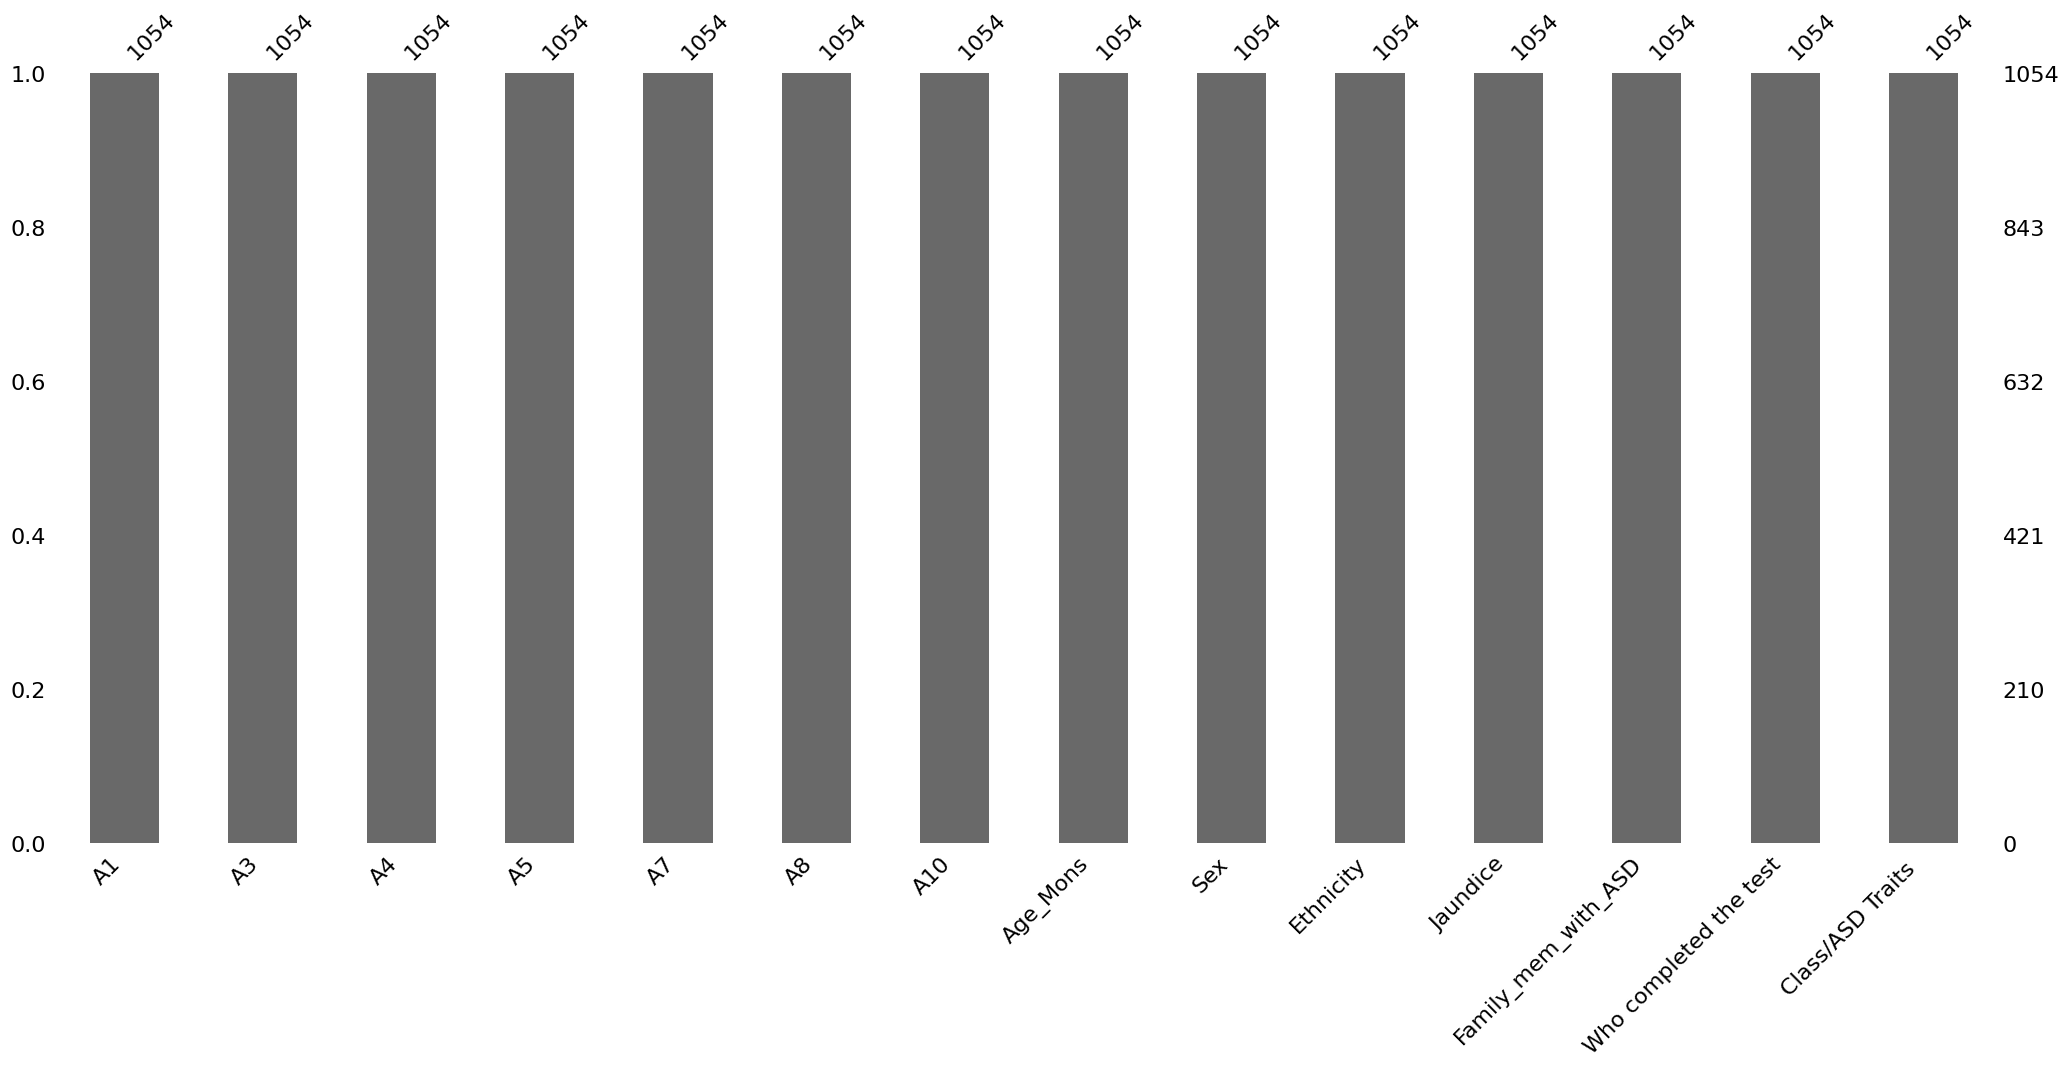

In [407]:
# Visualize missing data using missingno 
msno.bar(updated_df)
plt.show()

### - Outliers

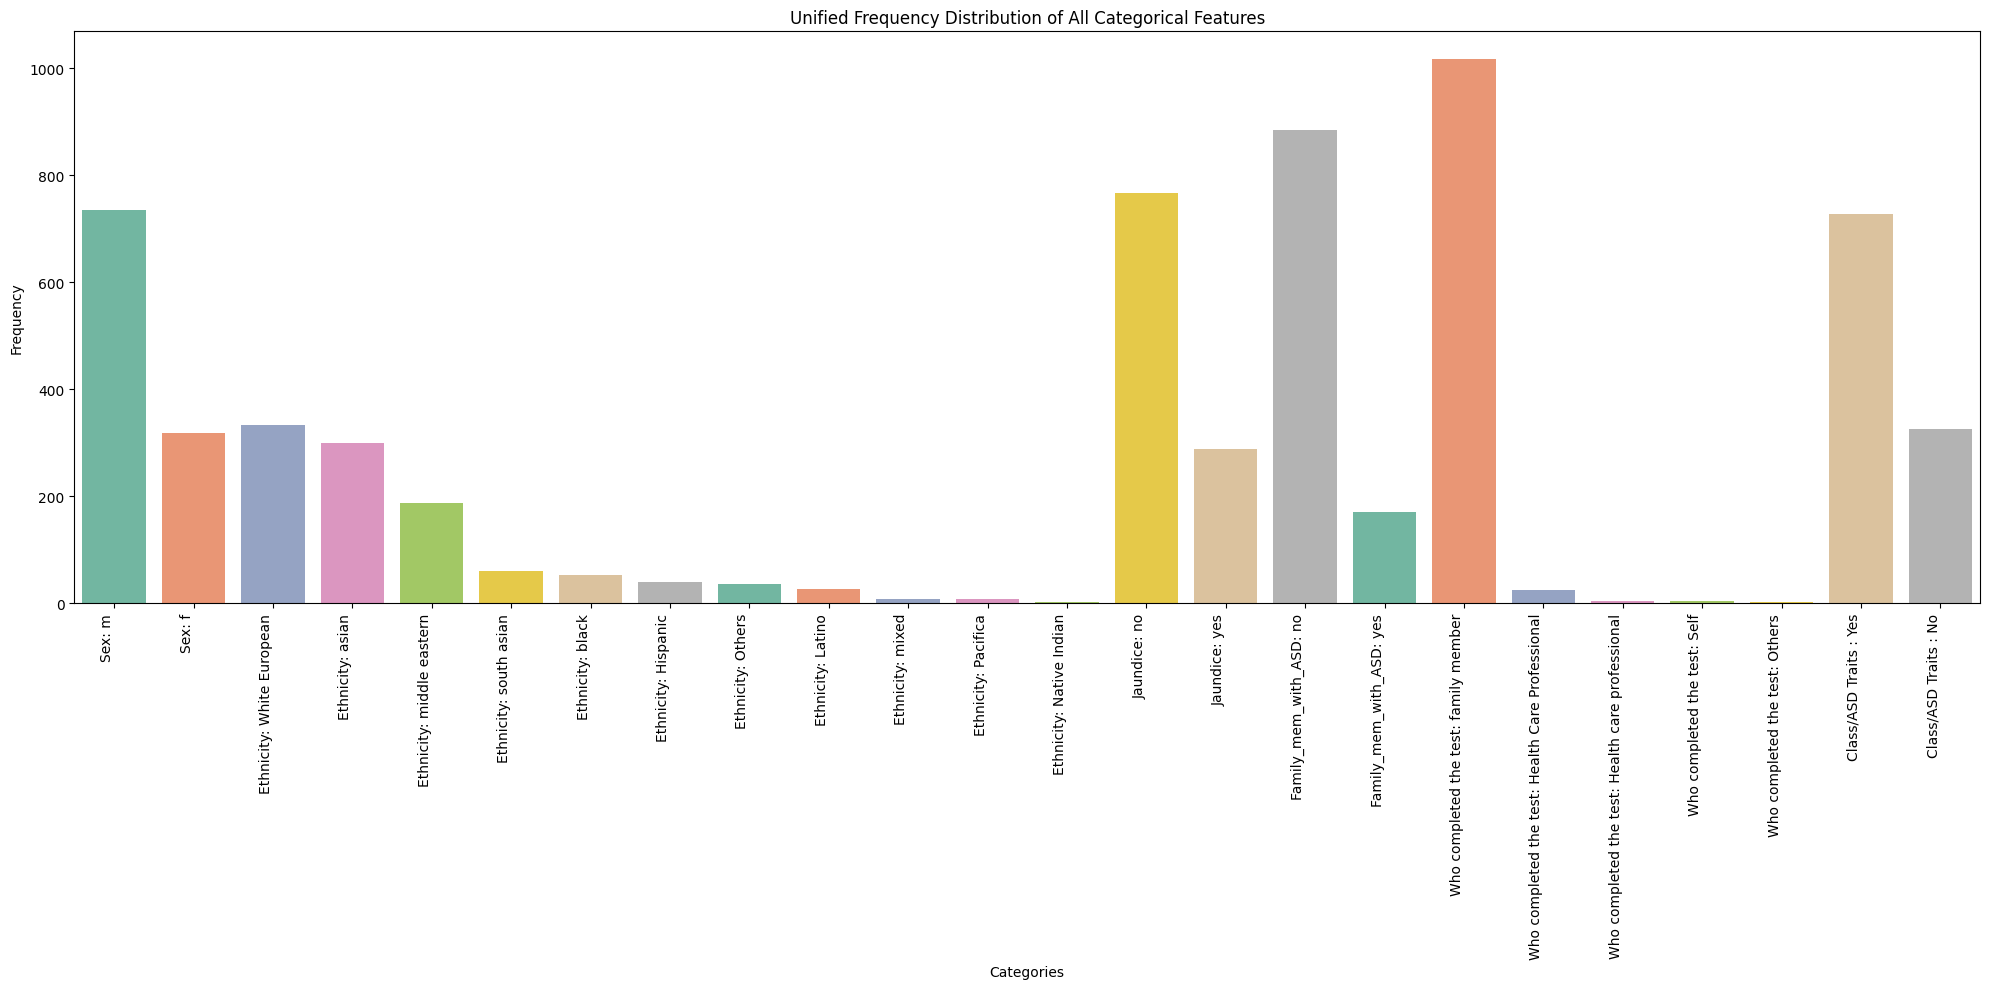

In [408]:
categorical_columns = updated_df.select_dtypes(include=['object']).columns
combined_counts_list = []
for col in categorical_columns:
    category_counts = updated_df[col].value_counts()
    category_counts.index = [f'{col}: {idx}' for idx in category_counts.index]  # Label with feature name
    combined_counts_list.append(category_counts)
combined_counts = pd.concat(combined_counts_list)
combined_counts_df = combined_counts.reset_index()
combined_counts_df.columns = ['Category', 'Frequency']
combined_counts_df['Feature'] = combined_counts_df['Category'].apply(lambda x: x.split(':')[0])
plt.figure(figsize=(20, 10))
sns.barplot(x='Category', y='Frequency', hue='Category', data=combined_counts_df, dodge=False, palette='Set2', legend=False)
plt.title('Unified Frequency Distribution of All Categorical Features')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [409]:
categorical_columns = updated_df.select_dtypes(include=['object', 'category']).columns
threshold_ratio=0.2
outliers_dict = {}
for col in categorical_columns:
    category_counts = updated_df[col].value_counts()
    mean_freq = category_counts.mean()
    median_freq = category_counts.median()
    lower_threshold = median_freq * threshold_ratio
    outliers = category_counts[category_counts < lower_threshold]
    outliers_dict[col] = outliers
for feature, outlier_values in outliers_dict.items():
    if not outlier_values.empty:
        print(f"\nOutliers in {feature}:")
        print(outlier_values)


Outliers in Ethnicity:
Ethnicity
Native Indian    3
Name: count, dtype: int64


In [410]:
updated_df['Ethnicity'].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [411]:
native_indian_rows = updated_df[updated_df['Ethnicity'] == 'Native Indian']
print(native_indian_rows)

     A1  A3  A4  A5  A7  A8  A10  Age_Mons Sex      Ethnicity Jaundice  \
22    1   1   1   0   1   1    1        36   m  Native Indian      yes   
495   1   1   1   1   1   1    1        34   m  Native Indian      yes   
947   1   0   0   1   1   0    1        36   m  Native Indian       no   

    Family_mem_with_ASD    Who completed the test Class/ASD Traits   
22                  yes  Health Care Professional               Yes  
495                  no             family member               Yes  
947                  no             family member               Yes  


<p><strong>Conclusion</strong>: After implementing the frequency analysis of each feature, we identified the number of outliers and calculated the count of each value within the features where outliers were detected. Upon examining the rows containing these outliers, we found that the target value for all of them was "Yes," indicating that these individuals are autistic. Based on this observation, we decided to retain the outliers in the dataset to allow the model to become familiar with such inputs and learn from them. Keeping these outliers will help the model better recognize similar patterns in future predictions, enhancing its ability to correctly identify autistic individuals.</p>

In [412]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A3                      1054 non-null   int64 
 2   A4                      1054 non-null   int64 
 3   A5                      1054 non-null   int64 
 4   A7                      1054 non-null   int64 
 5   A8                      1054 non-null   int64 
 6   A10                     1054 non-null   int64 
 7   Age_Mons                1054 non-null   int64 
 8   Sex                     1054 non-null   object
 9   Ethnicity               1054 non-null   object
 10  Jaundice                1054 non-null   object
 11  Family_mem_with_ASD     1054 non-null   object
 12  Who completed the test  1054 non-null   object
 13  Class/ASD Traits        1054 non-null   object
dtypes: int64(8), object(6)
memory usage: 115.4+ KB


In [413]:
updated_df = updated_df.rename(columns={
    "Who completed the test": "Who_completed_the_test",
    "Class/ASD Traits ": "Class_ASD_Traits"
})
updated_df['Class_ASD_Traits'] = updated_df['Class_ASD_Traits'].map({'Yes': 1, 'No': 0})
updated_df['Class_ASD_Traits'] = updated_df['Class_ASD_Traits'].astype('float32')
updated_df.head()

A1  A3  A4  A5  A7  A8  A10  Age_Mons Sex       Ethnicity Jaundice  \
0   0   0   0   0   1   1    1        28   f  middle eastern      yes   
1   1   0   0   0   1   0    0        36   m  White European      yes   
2   1   0   0   0   1   1    1        36   m  middle eastern      yes   
3   1   1   1   1   1   1    1        24   m        Hispanic       no   
4   1   0   1   1   1   1    1        20   f  White European       no   

  Family_mem_with_ASD Who_completed_the_test  Class_ASD_Traits  
0                  no          family member               0.0  
1                  no          family member               1.0  
2                  no          family member               1.0  
3                  no          family member               1.0  
4                 yes          family member               1.0

In [414]:
categorical_headers = ['Sex','Ethnicity','Jaundice',
                       'Family_mem_with_ASD','Who_completed_the_test']
numeric_headers = ['A1', 'A3', 'A4','A5','A7','A8','A10','Age_Mons']


In [415]:
batch_size = 64

def create_dataset_from_dataframe(df_input):

    df = df_input.copy()
    labels = df['Class_ASD_Traits']

    df = {key: value.values[:,np.newaxis] for key, value in df_input[categorical_headers+numeric_headers].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

In [416]:
dataset = create_dataset_from_dataframe(updated_df)

In [417]:
[(feat,label)] = dataset.take(1)
print('The keys in the feature data are:')
print(feat.keys())
print('\nThe feature shape for Age_Mons is:')
print('Shape:',feat['Age_Mons'].shape)
print('Max:',max(feat['Age_Mons']))
print('\nThe labels for this batch are:')
print(label) # print one batch of the labels 

The keys in the feature data are:
dict_keys(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test', 'A1', 'A3', 'A4', 'A5', 'A7', 'A8', 'A10', 'Age_Mons'])

The feature shape for Age_Mons is:
Shape: (64, 1)
Max: tf.Tensor([36], shape=(1,), dtype=int64)

The labels for this batch are:
tf.Tensor(
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.], shape=(64,), dtype=float32)


In [418]:
feature_space = FeatureSpace(
    features={
        "Sex": FeatureSpace.string_categorical(num_oov_indices=0),
        "Ethnicity": FeatureSpace.string_categorical(num_oov_indices=0),
        "Jaundice": FeatureSpace.string_categorical(num_oov_indices=0),
        "Family_mem_with_ASD": FeatureSpace.string_categorical(num_oov_indices=0),
        "Who_completed_the_test": FeatureSpace.string_categorical(num_oov_indices=0),
        "Age_Mons": FeatureSpace.float_discretized(num_bins=4),
        "A1": FeatureSpace.float_normalized(),
        "A3": FeatureSpace.float_normalized(),
        "A4": FeatureSpace.float_normalized(),
        "A5": FeatureSpace.float_normalized(),
        "A7": FeatureSpace.float_normalized(),
        "A8": FeatureSpace.float_normalized(),
        "A10": FeatureSpace.float_normalized(),
    },
    output_mode="concat",
)

<h4>- Final dataset</h4>
<p>The final dataset used for classification has gone under a series of preprocessing transformations through a Keras FeatureSpace. Categorical variables—Sex, Ethnicity, Jaundice, Family_mem_with_ASD, and Who completed the test—are encoded as string categorical features, where each unique category is represented with a distinct embedding, providing structured numeric representations of these qualitative values. The continuous feature Age_Mons is discretized into four bins, effectively segmenting the age variable into distinct age ranges. This transformation creates new categorical intervals, simplifying the impact of Age_Mons on model learning. The remaining features, A1, A3, A4, A5, A7, A8, and A10, represent various assessment scores, which are normalized to ensure they fall within a consistent range, standardizing these values across different scales. The entire set of features is then concatenated into a single tensor for each instance in the dataset, yielding a unified, processed input format that maintains a consistent structure for downstream classification task. </p>

In [419]:
train_ds_with_no_labels = dataset.map(lambda x, _: x)  
feature_space.adapt(train_ds_with_no_labels)
preprocessed_dataset = dataset.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_dataset = preprocessed_dataset.prefetch(tf.data.AUTOTUNE)

In [420]:
for batch_x, batch_y in preprocessed_dataset.take(1):
    # Access the first instance in the batch
    single_x = batch_x[0]
    single_y = batch_y[0]
    
    print("Single Instance Features:", single_x)
    print("Single Instance Label:", single_y)

Single Instance Features: tf.Tensor(
[-1.5179181   0.83994144 -0.8187581  -1.0249798  -1.0506155   0.4869178
  1.0852123   0.          1.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          1.          1.          0.
  0.          0.          0.        ], shape=(33,), dtype=float32)
Single Instance Label: tf.Tensor(0.0, shape=(), dtype=float32)


### - Gender/ASD relationship
<p>Research has consistently highlighted that gender is a significant factor in the diagnosis of Autism Spectrum Disorder (ASD). Numerous studies indicate that men are more susceptible to being diagnosed with ASD compared to women. This gender disparity suggests underlying biological, genetic, and possibly social factors that influence the prevalence of ASD between genders. Understanding the relationship between gender and ASD is crucial, as it not only informs diagnostic practices but also helps tailor interventions and support systems that are sensitive to these differences. The graph depicting the relationship between gender and ASD further illustrates this trend.</p>

<h4>1.2  cross-product features</h4>
<p>The cross-product features are created by combining two or more existing features to capture potential relationships between them. This technique allows the model to learn from the interactions between different features, leading to more accurate and robust predictions. The cross-product features will be created using the categorical variables only that include 6 variables (Sex, Ethnicity, Jaundice, Family_mem_with_ASD,Who completed the test). The groups of features for creating cross-product features are identified as follow:- </p>

<h5>1. Who completed the test × Family_mem_with_ASD </h5>
<ul>
    <li><strong>Justification:</strong> The person completing the test may influence the reporting style or interpretation of symptoms. For example, if a Parent with Family_mem_with_ASD completes the test, they might be more aware of symptoms or inclined to notice ASD traits, while a Healthcare Professional may assess more clinically. This interaction could help the model weigh the influence of familial awareness in responses. </li>
</ul>

<h5>2. Family History (Family_mem_with_ASD) and Jaundice</h5>
<ul>
    <li><strong>Justification:</strong> Research suggests that autism develops from a combination of genetic, non-genetic, or environmental influences. The features Family_mem_with_ASD and Jaundice may indicate genetic and early-life factors that are potential risk markers for autism. By crossing these features, the model can capture combinations where both factors are present, potentially highlighting an increased risk profile. For instance, children with both a family history of ASD and jaundice at birth might be more likely to display autism traits.</li>
</ul>

<h5>3. Ethnicity and Who Completed the Test</h5>
<ul>
    <li><strong>Justification:</strong> <code>Ethnicity</code> and <code>Who completed the test</code> (likely a parent, guardian, or professional) could interact in a way that influences responses due to cultural perceptions or observational differences. Certain ethnic groups may respond differently depending on who completed the test, as perceptions or knowledge of autism traits can vary culturally and influence screening accuracy. By crossing these features, the model may capture culturally influenced response patterns and observational differences, potentially enhancing sensitivity to diverse backgrounds.</li>
</ul>

<p>Some features may not be beneficial for cross-products:</p>

<ul>
    <li><strong>Ethnicity and Sex:</strong> While these demographic features might provide standalone insights, crossing them does not have a clear, interpretable relationship within the autism screening context, and it might add noise rather than signal to the model.</li>
    <li><strong>Autism-Related Traits Crossed with Each Other:</strong> Crosses among the autism-related trait features (<code>A1</code>, <code>A3</code>, etc.)might increase dimensionality without substantial interpretability benefits. Each question independently provides diagnostic insights, and crossing them could make the model overly complex without necessarily improving autism trait detection.</li>
</ul>

<h3>Conclusion</h3>
<p>Cross-product features involving <code>Age_Mons</code>, <code>Sex</code>, family history, and specific autism traits are likely to enhance the model’s ability to detect meaningful patterns in autism screening. These combinations can help the model capture developmental, genetic, and cultural influences, potentially improving predictive performance and interpretability.</p>
</p>

<h4>1.3 Evaluation Metric</h4>

<p>For evaluating the autism screening model, the most appropriate metrics are Precision, Recall, and the F1 Score. Precision measures the proportion of children predicted by the model as having autism traits who truly have those traits, which is important in healthcare to reduce false positives and avoid unnecessary concern and costly follow-up for families. Recall, on the other hand, indicates the model's ability to identify children who actually exhibit autism traits, which is crucial for ensuring that those who may benefit from early intervention are not missed. A high recall is essential, as missing a child with potential autism traits could delay valuable support. The F1 Score, as the harmonic mean of precision and recall, provides a balanced evaluation by optimizing for both false positives and false negatives, making it especially relevant in this context. While accuracy is often a standard metric, it is not ideal here due to the potential imbalance in autism traits within the dataset, which could lead to a misleadingly high accuracy even if the model fails to detect autism traits effectively. Instead, by focusing on precision, recall, and the F1 score, we prioritize reliable identification of children with autism traits while minimizing false alarms, aligning well with healthcare objectives of early identification and reducing undue stress on families.</p>

<h4>1.4 Splitting of the data into training and testing</h4>
<p>To evaluate our model effectively on this small and imbalanced autism screening dataset, we will use Stratified 10-Fold Cross Validation. This method is particularly suited to our data characteristics, as it ensures that each fold maintains a similar class distribution to the original dataset, which is crucial for preserving the representation of minority classes. By using 10 folds, we maximize data utilization, allowing each data point to serve as part of the validation set once and the training set nine times, thereby providing the model with the opportunity to learn from different samples. Stratification is essential in handling class imbalance, as it prevents any single fold from disproportionately favoring the majority class, leading to more reliable and fair performance metrics. This approach also yields a realistic reflection of real-world scenarios, where the model would likely encounter data with a similar class distribution. Ultimately, stratified 10-fold cross-validation allows us to obtain a stable, comprehensive view of model performance through averaged metrics across folds, helping us assess its generalization capability in a way that is sensitive to both the dataset’s size and class imbalance.</p>

Class distribution: Counter({1.0: 728, 0.0: 326})

Class distribution (percentages): {0.0: 30.929791271347252, 1.0: 69.07020872865274}

The dataset is imbalanced.


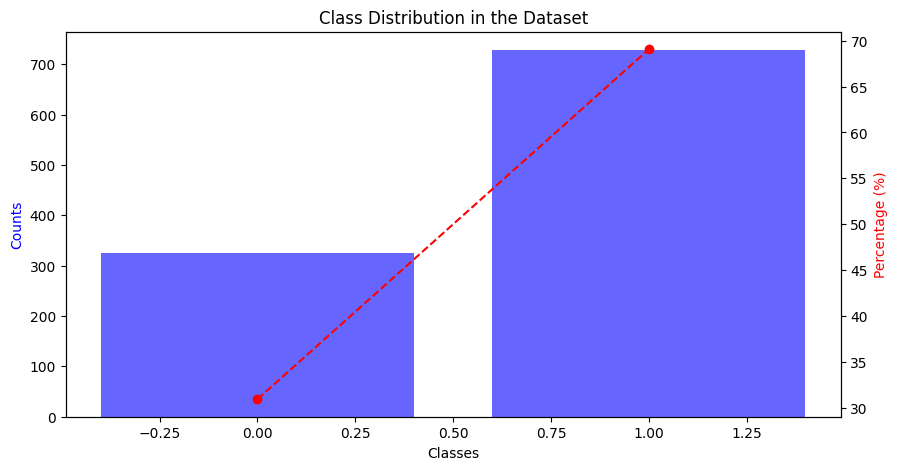

In [421]:
labels = []
for _, y in dataset:
    label = y.numpy()
    if label.size == 1:  
        labels.append(label.item())
    else: 
        labels.extend(label.flatten().tolist())

class_counts = Counter(labels)
print("Class distribution:", class_counts)


total_samples = sum(class_counts.values())
class_percentages = {cls: (count / total_samples) * 100 for cls, count in class_counts.items()}
print("\nClass distribution (percentages):", class_percentages)

threshold = 10 
percentage_values = list(class_percentages.values())
if max(percentage_values) - min(percentage_values) > threshold:
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

classes = list(class_counts.keys())
counts = list(class_counts.values())
percentages = list(class_percentages.values())
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(classes, counts, color='b', alpha=0.6)
ax1.set_xlabel("Classes")
ax1.set_ylabel("Counts", color='b')
ax1.set_title("Class Distribution in the Dataset")
ax2 = ax1.twinx()
ax2.plot(classes, percentages, color='r', marker='o', linestyle='--')
ax2.set_ylabel("Percentage (%)", color='r')
plt.show()


In [422]:
data= updated_df.drop(['Class_ASD_Traits'], axis=1) 
labels=updated_df.loc[:, 'Class_ASD_Traits']

In [423]:
data.head()

A1  A3  A4  A5  A7  A8  A10  Age_Mons Sex       Ethnicity Jaundice  \
0   0   0   0   0   1   1    1        28   f  middle eastern      yes   
1   1   0   0   0   1   0    0        36   m  White European      yes   
2   1   0   0   0   1   1    1        36   m  middle eastern      yes   
3   1   1   1   1   1   1    1        24   m        Hispanic       no   
4   1   0   1   1   1   1    1        20   f  White European       no   

  Family_mem_with_ASD Who_completed_the_test  
0                  no          family member  
1                  no          family member  
2                  no          family member  
3                  no          family member  
4                 yes          family member

In [424]:
labels.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Class_ASD_Traits, dtype: float32

In [425]:
cv_object = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
class_counts = []
X=data.to_numpy()
y= labels.to_numpy()
for train_indices, test_indices in cv_object.split(X, y):
    class_distribution = Counter(y[test_indices])
    class_counts.append(class_distribution)
for i, counts in enumerate(class_counts, start=1):
    print(f"Fold {i} class counts: {counts}")

Fold 1 class counts: Counter({1.0: 73, 0.0: 33})
Fold 2 class counts: Counter({1.0: 73, 0.0: 33})
Fold 3 class counts: Counter({1.0: 73, 0.0: 33})
Fold 4 class counts: Counter({1.0: 73, 0.0: 33})
Fold 5 class counts: Counter({1.0: 72, 0.0: 33})
Fold 6 class counts: Counter({1.0: 72, 0.0: 33})
Fold 7 class counts: Counter({1.0: 73, 0.0: 32})
Fold 8 class counts: Counter({1.0: 73, 0.0: 32})
Fold 9 class counts: Counter({1.0: 73, 0.0: 32})
Fold 10 class counts: Counter({1.0: 73, 0.0: 32})


In [426]:
train_dfs = []
test_dfs = []
for fold, (train_index, test_index) in enumerate(cv_object.split(X, y), start=1):
    train_df = updated_df.iloc[train_index].reset_index(drop=True)
    test_df = updated_df.iloc[test_index].reset_index(drop=True)
    train_dfs.append(train_df)
    test_dfs.append(test_df)
    print(f"Fold {fold}")
    print("Training Set Shape:", train_df.shape)
    print("Testing Set Shape:", test_df.shape)
    print("-" * 40)


Fold 1
Training Set Shape: (948, 14)
Testing Set Shape: (106, 14)
----------------------------------------
Fold 2
Training Set Shape: (948, 14)
Testing Set Shape: (106, 14)
----------------------------------------
Fold 3
Training Set Shape: (948, 14)
Testing Set Shape: (106, 14)
----------------------------------------
Fold 4
Training Set Shape: (948, 14)
Testing Set Shape: (106, 14)
----------------------------------------
Fold 5
Training Set Shape: (949, 14)
Testing Set Shape: (105, 14)
----------------------------------------
Fold 6
Training Set Shape: (949, 14)
Testing Set Shape: (105, 14)
----------------------------------------
Fold 7
Training Set Shape: (949, 14)
Testing Set Shape: (105, 14)
----------------------------------------
Fold 8
Training Set Shape: (949, 14)
Testing Set Shape: (105, 14)
----------------------------------------
Fold 9
Training Set Shape: (949, 14)
Testing Set Shape: (105, 14)
----------------------------------------
Fold 10
Training Set Shape: (949, 14)

In [427]:
preprocessed_datasets_train = []
preprocessed_datasets_test = []
for train_df, test_df in zip(train_dfs,test_dfs):
    train_ds = create_dataset_from_dataframe(train_df)
    test_ds = create_dataset_from_dataframe(test_df)
    train_ds_with_no_labels = train_ds.map(lambda x, _: x)
    feature_space.adapt(train_ds_with_no_labels)
    preprocessed_train_ds = train_ds.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    preprocessed_train_ds = preprocessed_train_ds.prefetch(tf.data.AUTOTUNE)
    preprocessed_datasets_train.append(preprocessed_train_ds)
    preprocessed_test_ds = test_ds.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    preprocessed_test_ds = preprocessed_test_ds.prefetch(tf.data.AUTOTUNE)
    preprocessed_datasets_test.append(preprocessed_test_ds)

<h2>2. Modeling</h2>
<p>We used TensorFlow’s FeatureSpace to preprocess features, creating embeddings for categorical variables like "Sex" and "Ethnicity" and crossing selected features (e.g., "Who_completed_the_test" with "Family_mem_with_ASD") to enhance the model’s ability to capture interactions.

Each model was trained and evaluated on a consistent training-validation split, with performance metrics (loss, precision, recall, and F1-score) plotted to analyze training and validation progress. These combined wide and deep models effectively balance complexity and accuracy, capturing both simple and complex patterns to improve ASD classification.






</p>

In [428]:
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

In [429]:
def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

In [430]:
feature_space = FeatureSpace(
    features={
        "Sex": FeatureSpace.string_categorical(num_oov_indices=0),
        "Ethnicity": FeatureSpace.string_categorical(num_oov_indices=0),
        "Jaundice": FeatureSpace.string_categorical(num_oov_indices=0),
        "Family_mem_with_ASD": FeatureSpace.string_categorical(num_oov_indices=0),
        "Who_completed_the_test": FeatureSpace.string_categorical(num_oov_indices=0),
        "Age_Mons": FeatureSpace.float_discretized(num_bins=4),
        "A1": FeatureSpace.float_normalized(),
        "A3": FeatureSpace.float_normalized(),
        "A4": FeatureSpace.float_normalized(),
        "A5": FeatureSpace.float_normalized(),
        "A7": FeatureSpace.float_normalized(),
        "A8": FeatureSpace.float_normalized(),
        "A10": FeatureSpace.float_normalized(),
    },
     crosses=[
        FeatureSpace.cross(
            feature_names=('Who_completed_the_test','Family_mem_with_ASD'), # dims: 5 x 2
            crossing_dim=5*2),
        FeatureSpace.cross(
            feature_names=('Family_mem_with_ASD','Jaundice'), # 2 x 2
            crossing_dim=2*2),
        FeatureSpace.cross(
            feature_names=('Ethnicity','Who_completed_the_test'), # 11 x 5
            crossing_dim=11*5),
    ],
    output_mode="concat",
)

<h4>2.1.1 Model One</h4>
<p>Model One was developed as follows:

The **wide branch** was constructed using the crossed categorical features specified in the code, which were processed through embedding layers. These crossed features, derived from pairs like `('Who_completed_the_test', 'Family_mem_with_ASD')`, `('Family_mem_with_ASD', 'Jaundice')`, and `('Ethnicity', 'Who_completed_the_test')`, capture interactions between these categorical variables. Each crossed feature was transformed into an embedding, and the resulting embeddings were concatenated to form the wide branch.

The **deep branch** was created by concatenating both the embedded categorical features and the numerical features. Categorical features like "Sex," "Ethnicity," "Jaundice," and "Family_mem_with_ASD" were embedded individually, while numeric features were cast to float and directly passed to the branch. The combined input from these embeddings and numeric values was then passed through three dense layers with 50, 25, and 10 neurons, respectively, each using ReLU activation functions. Dropout layers were added after each dense layer to reduce overfitting due to small size dataset.

Finally, the **wide and deep branches** were concatenated and passed through a dense layer with a sigmoid activation function to generate the binary prediction output. This structure enables the model to leverage both feature interactions (captured in the wide branch) and complex relationships (learned in the deep branch) for effective classification.</p>

In [431]:
class CastToFloat(Layer):
    def call(self, inputs):
        return tf.cast(inputs, float)

In [432]:
histories_model1=[]
models_1=[]
for train_df, test_df in zip(train_dfs,test_dfs):
    train_ds = create_dataset_from_dataframe(train_df)
    test_ds = create_dataset_from_dataframe(test_df)
    train_ds_with_no_labels = train_ds.map(lambda x, _: x)
    feature_space.adapt(train_ds_with_no_labels)
    dict_inputs = feature_space.get_inputs()
    crossed_outputs = []
    for col in feature_space.crossers.keys():
        x = setup_embedding_from_crossing(feature_space, col)
        crossed_outputs.append(x)
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)
    all_deep_branch_outputs = []
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        x = CastToFloat()(x)
        all_deep_branch_outputs.append(x)
    for col in categorical_headers:
        x = setup_embedding_from_categorical(feature_space, col)
        all_deep_branch_outputs.append(x)
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout1')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout2')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout3')(deep_branch)
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1,activation='sigmoid',
                         name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    models_1.append(training_model)
    training_model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=[Precision(name='precision'),Recall(name='recall')]
    )
    
    training_model.summary()
    
    history = training_model.fit(
    train_ds, epochs=20, validation_data=test_ds, verbose=2
    )
    histories_model1.append(history)


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_230"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 234ms/step - loss: 0.7227 - precision: 0.6712 - recall: 0.3802 - val_loss: 0.6675 - val_precision: 0.7143 - val_recall: 0.9589
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6487 - precision: 0.7256 - recall: 0.8519 - val_loss: 0.5981 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5857 - precision: 0.7138 - recall: 0.9557 - val_loss: 0.5165 - val_precision: 0.7019 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.5121 - precision: 0.7422 - recall: 0.9847 - val_loss: 0.4318 - val_precision: 0.7684 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.4548 - precision: 0.7500 - recall: 0.9893 - val_loss: 0.3569 - val_precision: 0.8588 - val_recall: 1.0000
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3798 - precision: 0.8113 - recall: 0.9847 - val_loss: 0.2853 - val_precision: 0.9241 - val_recall: 1.0000
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.3240 - precision: 0.8510 - recall: 0.9679 - val_loss: 0.2203 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_231"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 230ms/step - loss: 0.7090 - precision: 0.7465 - recall: 0.3282 - val_loss: 0.6513 - val_precision: 0.9041 - val_recall: 0.9041
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6251 - precision: 0.8191 - recall: 0.8229 - val_loss: 0.5841 - val_precision: 0.8642 - val_recall: 0.9589
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5659 - precision: 0.8084 - recall: 0.9405 - val_loss: 0.5087 - val_precision: 0.8765 - val_recall: 0.9726
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4901 - precision: 0.8277 - recall: 0.9679 - val_loss: 0.4085 - val_precision: 0.8861 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.4255 - precision: 0.8407 - recall: 0.9588 - val_loss: 0.3159 - val_precision: 0.8861 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3434 - precision: 0.8780 - recall: 0.9557 - val_loss: 0.2498 - val_precision: 0.8974 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2820 - precision: 0.8898 - recall: 0.9618 - val_loss: 0.2046 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_232"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 229ms/step - loss: 0.7180 - precision: 0.6821 - recall: 0.7435 - val_loss: 0.6469 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6343 - precision: 0.7088 - recall: 0.9328 - val_loss: 0.5568 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5711 - precision: 0.7298 - recall: 0.9771 - val_loss: 0.4650 - val_precision: 0.7935 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4992 - precision: 0.7477 - recall: 0.9817 - val_loss: 0.3721 - val_precision: 0.8690 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.4277 - precision: 0.7904 - recall: 0.9847 - val_loss: 0.2820 - val_precision: 0.9241 - val_recall: 1.0000
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3638 - precision: 0.8266 - recall: 0.9679 - val_loss: 0.2127 - val_precision: 1.0000 - val_recall: 0.9726
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.3150 - precision: 0.8623 - recall: 0.9557 - val_loss: 0.1601 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 231ms/step - loss: 0.7100 - precision: 0.7706 - recall: 0.3282 - val_loss: 0.6576 - val_precision: 0.8923 - val_recall: 0.7945
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6277 - precision: 0.8245 - recall: 0.7817 - val_loss: 0.5949 - val_precision: 0.8068 - val_recall: 0.9726
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5765 - precision: 0.7984 - recall: 0.9069 - val_loss: 0.5305 - val_precision: 0.8295 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.5016 - precision: 0.8267 - recall: 0.9542 - val_loss: 0.4484 - val_precision: 0.8488 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.4107 - precision: 0.8783 - recall: 0.9588 - val_loss: 0.3548 - val_precision: 0.8987 - val_recall: 0.9726
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3557 - precision: 0.8865 - recall: 0.9542 - val_loss: 0.2812 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2856 - precision: 0.9099 - recall: 0.9557 - val_loss: 0.2326 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_234"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 230ms/step - loss: 0.6279 - precision: 0.7424 - recall: 0.8216 - val_loss: 0.5666 - val_precision: 0.7742 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5405 - precision: 0.7833 - recall: 0.9314 - val_loss: 0.4607 - val_precision: 0.8090 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4531 - precision: 0.7995 - recall: 0.9726 - val_loss: 0.3568 - val_precision: 0.9000 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.3718 - precision: 0.8295 - recall: 0.9787 - val_loss: 0.2759 - val_precision: 0.9221 - val_recall: 0.9861
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3201 - precision: 0.8759 - recall: 0.9573 - val_loss: 0.2199 - val_precision: 0.9459 - val_recall: 0.9722
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.2738 - precision: 0.9007 - recall: 0.9543 - val_loss: 0.1860 - val_precision: 0.9851 - val_recall: 0.9167
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2466 - precision: 0.9248 - recall: 0.9375 - val_loss: 0.1634 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_235"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 235ms/step - loss: 0.6219 - precision: 0.7221 - recall: 0.8201 - val_loss: 0.5095 - val_precision: 0.7660 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5347 - precision: 0.7627 - recall: 0.9162 - val_loss: 0.4171 - val_precision: 0.8276 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4585 - precision: 0.7955 - recall: 0.9665 - val_loss: 0.3315 - val_precision: 0.8659 - val_recall: 0.9861
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.3946 - precision: 0.8132 - recall: 0.9558 - val_loss: 0.2558 - val_precision: 0.9221 - val_recall: 0.9861
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3403 - precision: 0.8400 - recall: 0.9604 - val_loss: 0.1984 - val_precision: 0.9342 - val_recall: 0.9861
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3077 - precision: 0.8624 - recall: 0.9558 - val_loss: 0.1581 - val_precision: 0.9467 - val_recall: 0.9861
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2522 - precision: 0.8993 - recall: 0.9527 - val_loss: 0.1329 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_236"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 228ms/step - loss: 0.7084 - precision: 0.7989 - recall: 0.4427 - val_loss: 0.6224 - val_precision: 0.8451 - val_recall: 0.8219
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5924 - precision: 0.8256 - recall: 0.8168 - val_loss: 0.5609 - val_precision: 0.7778 - val_recall: 0.9589
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5206 - precision: 0.8299 - recall: 0.9313 - val_loss: 0.4986 - val_precision: 0.8046 - val_recall: 0.9589
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4746 - precision: 0.8405 - recall: 0.9573 - val_loss: 0.4286 - val_precision: 0.8519 - val_recall: 0.9452
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3862 - precision: 0.8770 - recall: 0.9359 - val_loss: 0.3631 - val_precision: 0.8701 - val_recall: 0.9178
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3327 - precision: 0.8919 - recall: 0.9450 - val_loss: 0.3093 - val_precision: 0.8816 - val_recall: 0.9178
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2791 - precision: 0.9022 - recall: 0.9435 - val_loss: 0.2758 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_237"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 228ms/step - loss: 0.6455 - precision: 0.7040 - recall: 0.9115 - val_loss: 0.5900 - val_precision: 0.7228 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5641 - precision: 0.7297 - recall: 0.9725 - val_loss: 0.4953 - val_precision: 0.7766 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4847 - precision: 0.7440 - recall: 0.9939 - val_loss: 0.3978 - val_precision: 0.8588 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4141 - precision: 0.7771 - recall: 0.9847 - val_loss: 0.3096 - val_precision: 0.9012 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3459 - precision: 0.8242 - recall: 0.9878 - val_loss: 0.2471 - val_precision: 0.9241 - val_recall: 1.0000
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3125 - precision: 0.8393 - recall: 0.9725 - val_loss: 0.2016 - val_precision: 0.9865 - val_recall: 1.0000
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2651 - precision: 0.8942 - recall: 0.9679 - val_loss: 0.1655 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_238"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 228ms/step - loss: 0.6647 - precision: 0.6908 - recall: 0.9038 - val_loss: 0.6401 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6005 - precision: 0.6972 - recall: 0.9878 - val_loss: 0.5618 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5240 - precision: 0.6931 - recall: 1.0000 - val_loss: 0.4780 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4642 - precision: 0.6939 - recall: 1.0000 - val_loss: 0.4149 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.4212 - precision: 0.7076 - recall: 0.9939 - val_loss: 0.3669 - val_precision: 0.7300 - val_recall: 1.0000
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3662 - precision: 0.7602 - recall: 0.9969 - val_loss: 0.3273 - val_precision: 0.7526 - val_recall: 1.0000
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.3260 - precision: 0.8325 - recall: 0.9939 - val_loss: 0.2897 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_239"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 2,901 (11.36 KB)

 Trainable params: 2,880 (11.25 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 3s - 228ms/step - loss: 0.6829 - precision: 0.8153 - recall: 0.4718 - val_loss: 0.6308 - val_precision: 0.8471 - val_recall: 0.9863
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6094 - precision: 0.8215 - recall: 0.8855 - val_loss: 0.5571 - val_precision: 0.8202 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.5289 - precision: 0.8437 - recall: 0.9557 - val_loss: 0.4695 - val_precision: 0.8795 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4603 - precision: 0.8573 - recall: 0.9542 - val_loss: 0.3787 - val_precision: 0.8889 - val_recall: 0.9863
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3781 - precision: 0.8944 - recall: 0.9573 - val_loss: 0.3056 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3283 - precision: 0.8925 - recall: 0.9634 - val_loss: 0.2577 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2662 - precision: 0.9258 - recall: 0.9527 - val_loss: 0.2229 

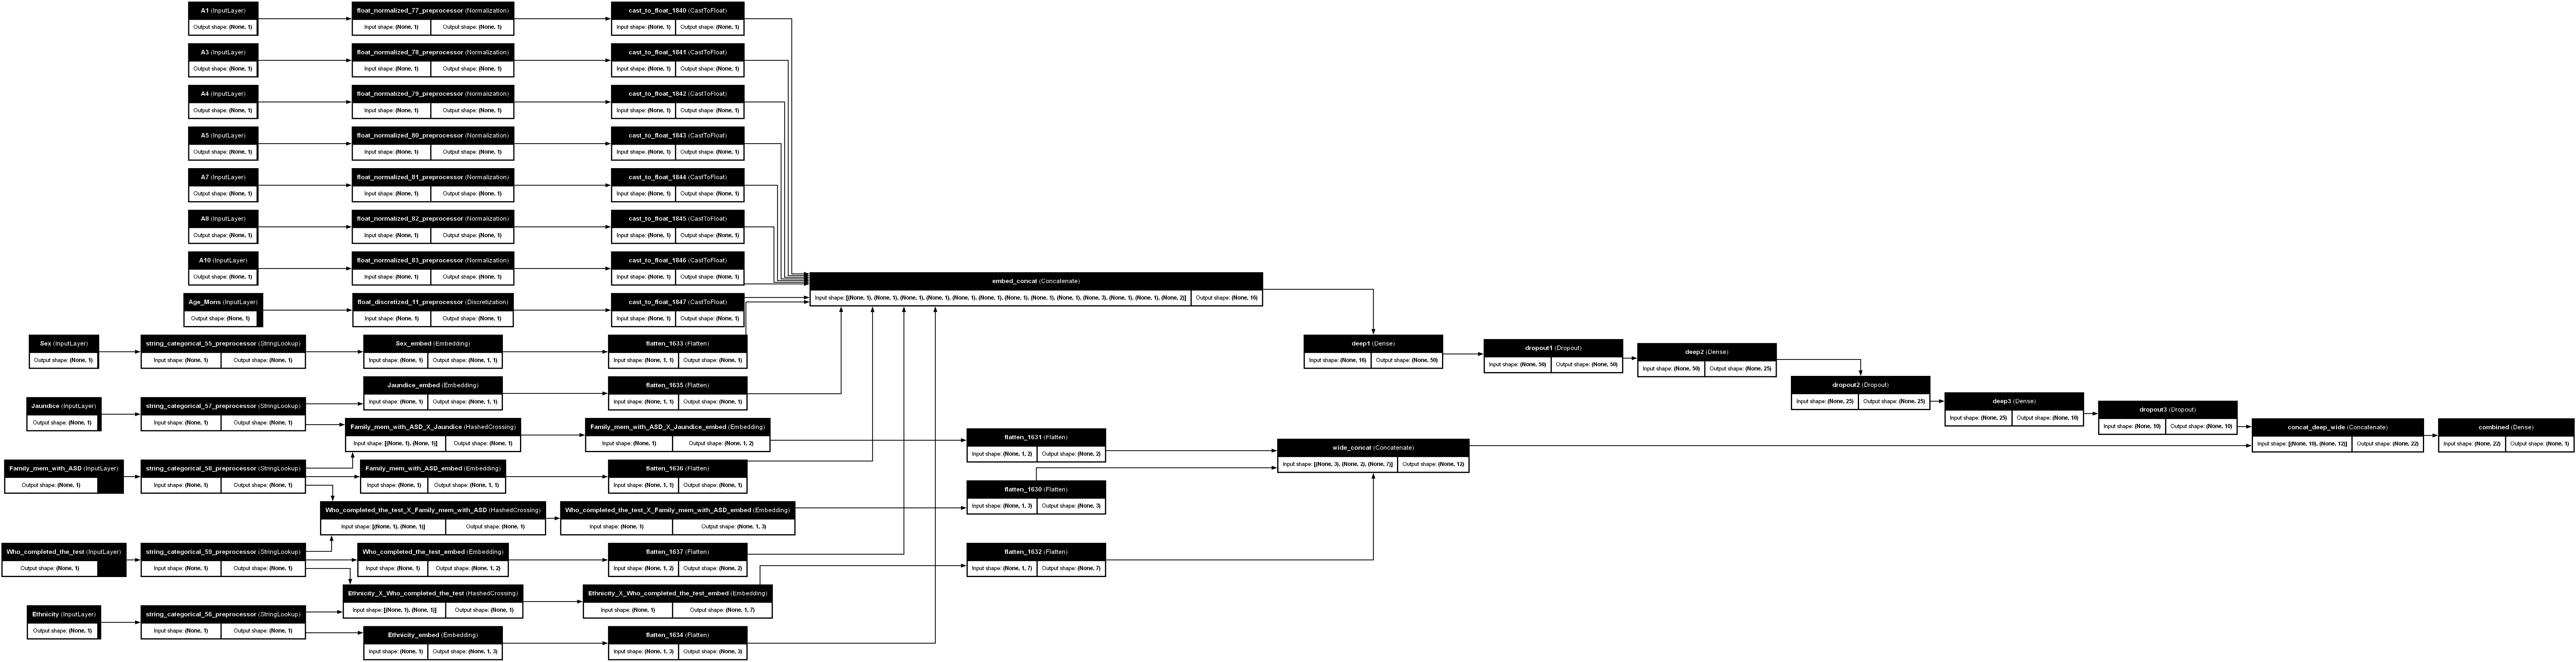

In [433]:
plot_model(
    models_1[0], to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

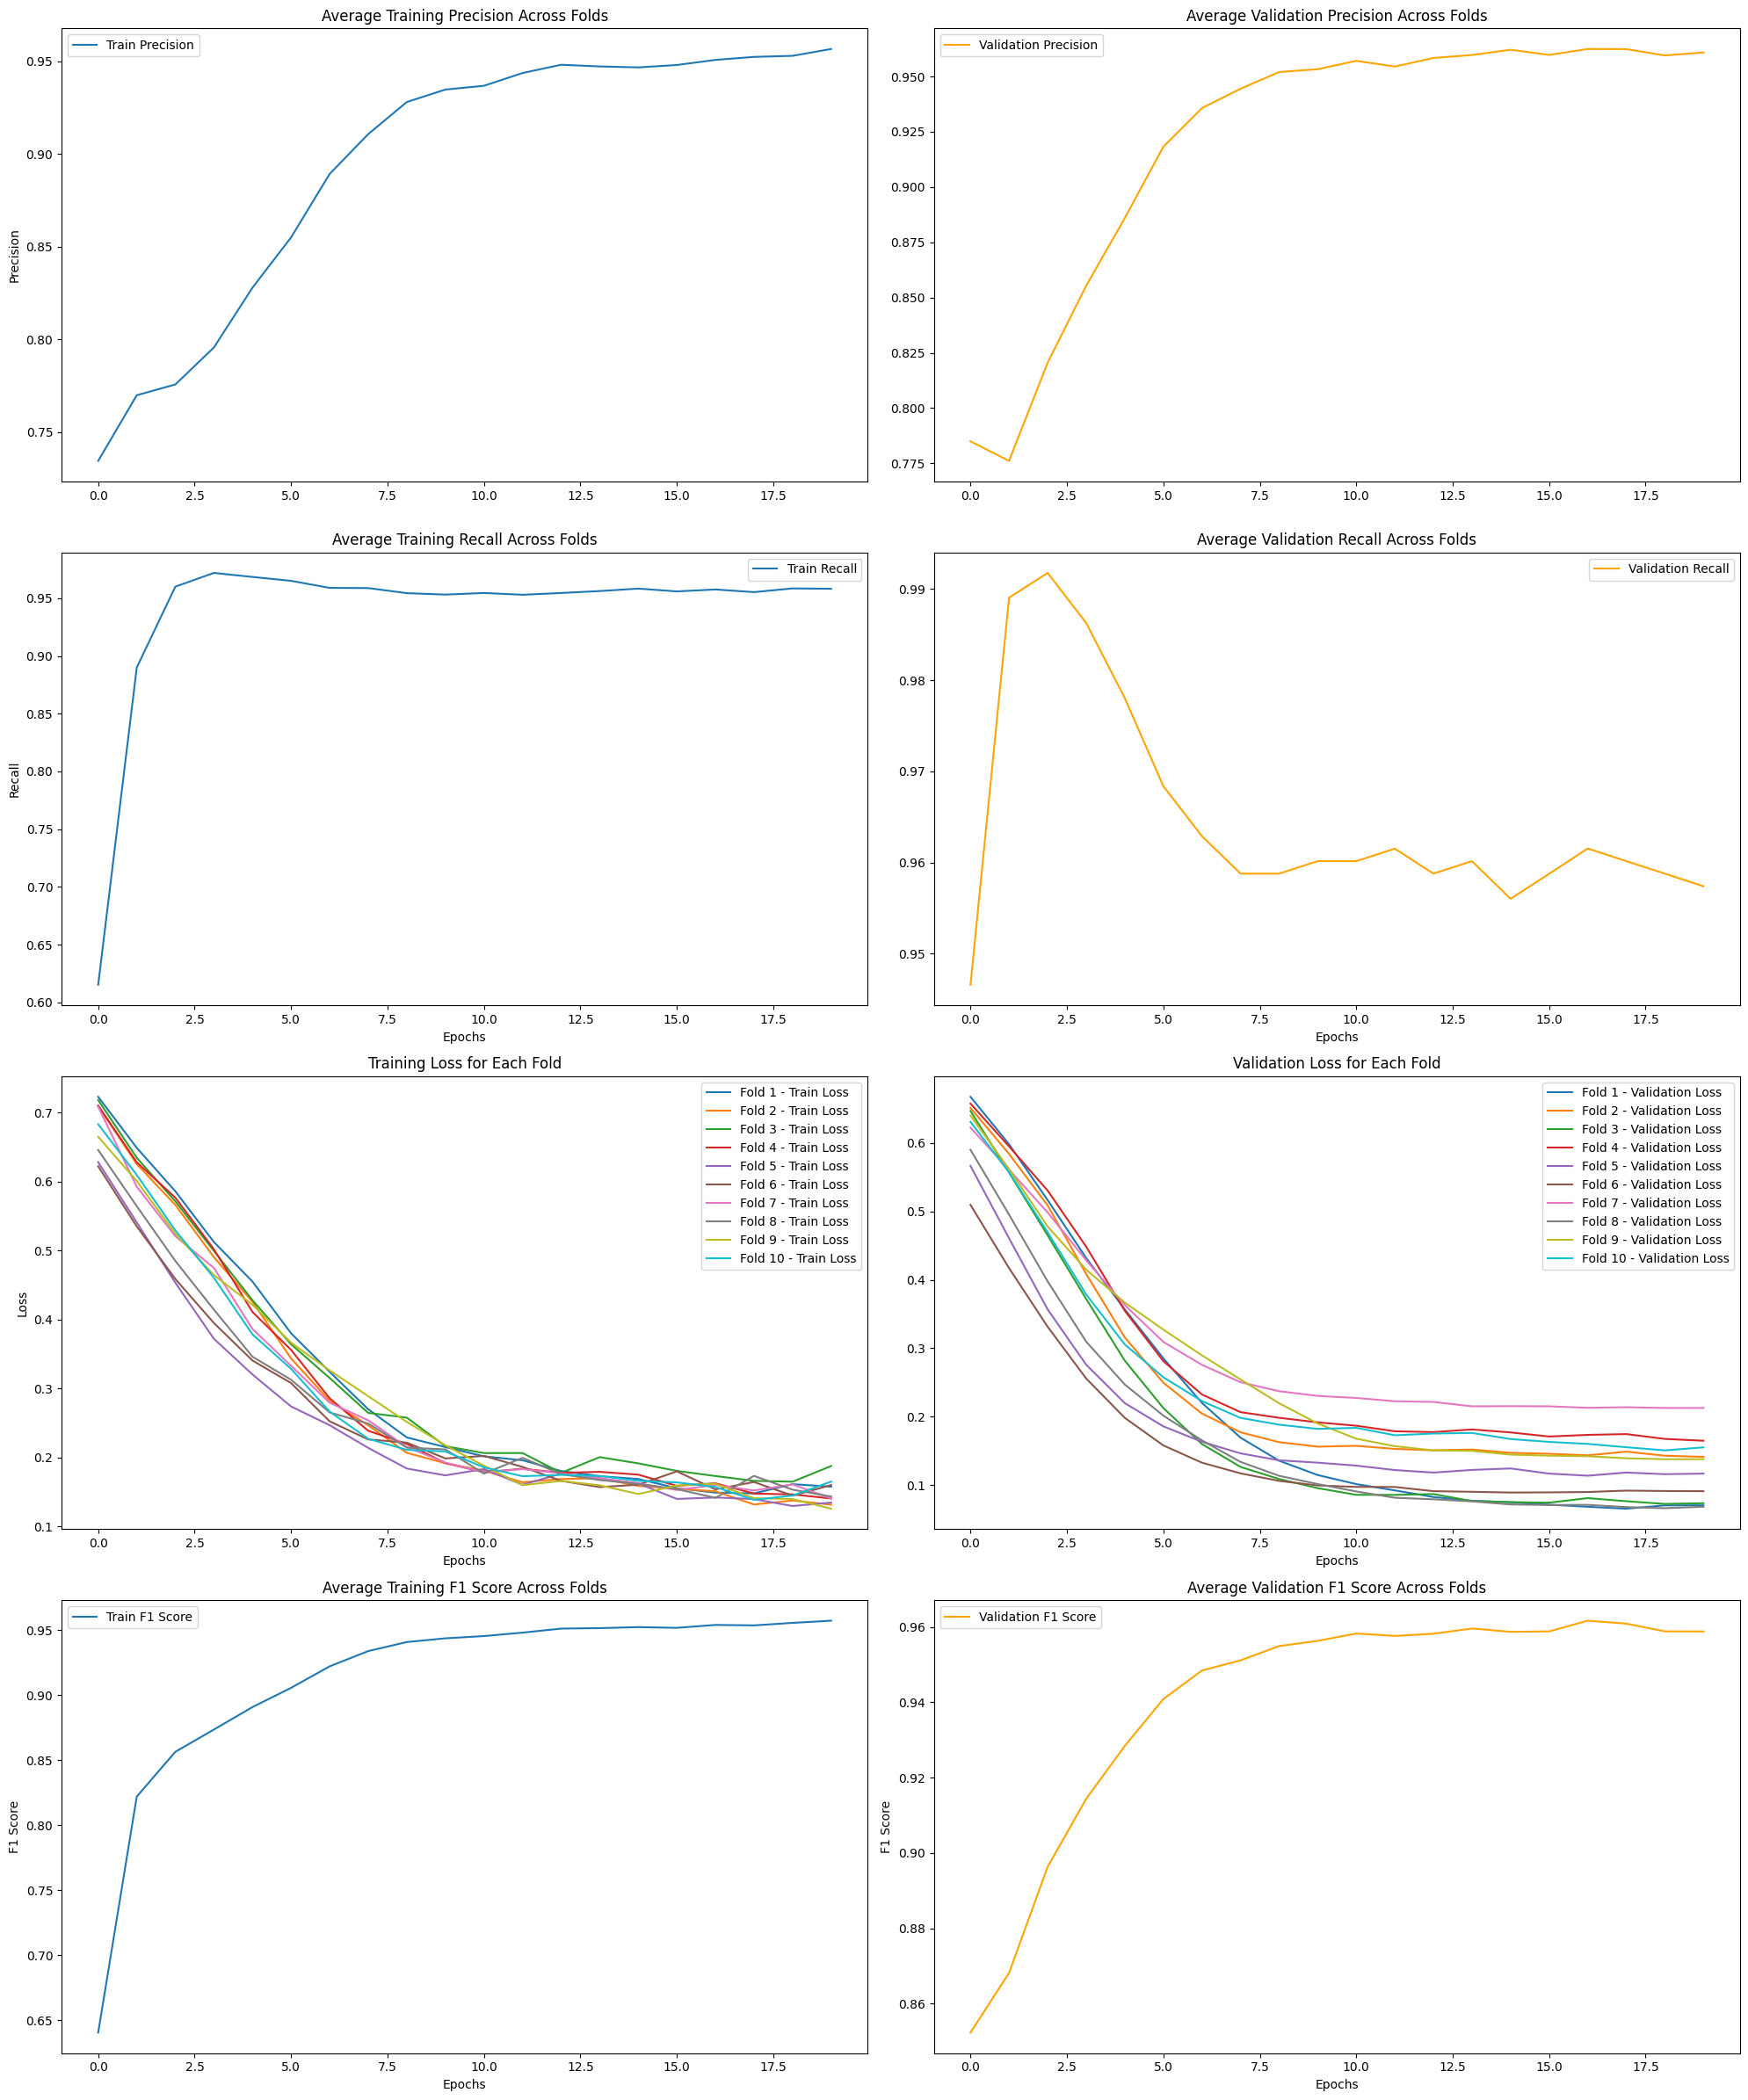

In [434]:
num_epochs = len(histories_model1[0].history['loss'])
num_folds = len(histories_model1)


f1_scores_train_model1 = []
f1_scores_val_model1 = []


avg_train_precision = np.zeros(num_epochs)
avg_val_precision = np.zeros(num_epochs)
avg_train_recall = np.zeros(num_epochs)
avg_val_recall = np.zeros(num_epochs)


for history in histories_model1:
    train_precision = np.array(history.history['precision'])
    val_precision = np.array(history.history['val_precision'])
    train_recall = np.array(history.history['recall'])
    val_recall = np.array(history.history['val_recall'])
    

    f1_scores_train = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-10)
    f1_scores_val = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-10)
    

    f1_scores_train_model1.append(f1_scores_train)
    f1_scores_val_model1.append(f1_scores_val)
    

    avg_train_precision += train_precision
    avg_val_precision += val_precision
    avg_train_recall += train_recall
    avg_val_recall += val_recall


avg_train_precision /= num_folds
avg_val_precision /= num_folds
avg_train_recall /= num_folds
avg_val_recall /= num_folds


avg_f1_scores_train = np.mean(f1_scores_train_model1, axis=0)
avg_f1_scores_val = np.mean(f1_scores_val_model1, axis=0)


plt.figure(figsize=(20, 24))


plt.subplot(4, 2, 1)
plt.plot(avg_train_precision, label='Train Precision')
plt.ylabel('Precision')
plt.title('Average Training Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 2)
plt.plot(avg_val_precision, label='Validation Precision', color='orange')
plt.title('Average Validation Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 3)
plt.plot(avg_train_recall, label='Train Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.title('Average Training Recall Across Folds')
plt.legend()


plt.subplot(4, 2, 4)
plt.plot(avg_val_recall, label='Validation Recall', color='orange')
plt.xlabel('Epochs')
plt.title('Average Validation Recall Across Folds')
plt.legend()


for i, history in enumerate(histories_model1):
    train_loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])
    

    plt.subplot(4, 2, 5)
    plt.plot(train_loss, label=f'Fold {i+1} - Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Training Loss for Each Fold')
    

    plt.subplot(4, 2, 6)
    plt.plot(val_loss, label=f'Fold {i+1} - Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Validation Loss for Each Fold')


plt.subplot(4, 2, 5)
plt.legend()
plt.subplot(4, 2, 6)
plt.legend()

# Plot average F1 scores for training and validation in separate figures
plt.subplot(4, 2, 7)
plt.plot(avg_f1_scores_train, label='Train F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Training F1 Score Across Folds')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(avg_f1_scores_val, label='Validation F1 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Validation F1 Score Across Folds')
plt.legend()

plt.tight_layout()
plt.show()


<h4>2.1.2 Modeling model 2 4 layers in deep side</h4>
<p>Model Two was developed as follows:

The **wide branch** was constructed using crossed categorical features defined in the feature space. These feature pairs, such as `('Who_completed_the_test', 'Family_mem_with_ASD')`, `('Family_mem_with_ASD', 'Jaundice')`, and `('Ethnicity', 'Who_completed_the_test')`, capture interactions between categorical variables, enhancing the model’s ability to identify patterns in the data. Each crossed feature was transformed through embedding layers, and these embeddings were concatenated to form the wide branch.

The **deep branch** combines both embedded categorical features and numeric features. Categorical features, including "Sex," "Ethnicity," "Jaundice," and "Family_mem_with_ASD," were each embedded, while numerical features were cast to float and incorporated directly. These inputs were then passed through a series of four dense layers with progressively smaller neuron counts to capture complex relationships in the data. The deep branch includes:
- A dense layer with 75 units,
- A dense layer with 50 units,
- A dense layer with 25 units, and
- A dense layer with 10 units.

Each dense layer uses a ReLU activation function, and dropout layers with a rate of 0.3 were added after each dense layer to mitigate overfitting.

Finally, the outputs from the wide and deep branches were concatenated and passed through a final dense layer with a sigmoid activation function to produce the binary classification output. This architecture allows the model to leverage both feature interactions (from the wide branch) and complex hierarchical patterns (from the deep branch) to effectively classify the data.</p>

In [435]:
histories_model2=[]
models_2=[]
for train_df, test_df in zip(train_dfs,test_dfs):
    train_ds = create_dataset_from_dataframe(train_df)
    test_ds = create_dataset_from_dataframe(test_df)
    train_ds_with_no_labels = train_ds.map(lambda x, _: x)
    feature_space.adapt(train_ds_with_no_labels)
    dict_inputs = feature_space.get_inputs()
    crossed_outputs = []
    for col in feature_space.crossers.keys():
        x = setup_embedding_from_crossing(feature_space, col)
        crossed_outputs.append(x)
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)
    all_deep_branch_outputs = []
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        x = CastToFloat()(x)
        all_deep_branch_outputs.append(x)
    for col in categorical_headers:
        x = setup_embedding_from_categorical(feature_space, col)
        all_deep_branch_outputs.append(x)
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=75,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout1')(deep_branch)
    deep_branch = Dense(units=50,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout2')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout3')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout4')(deep_branch)
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1,activation='sigmoid',
                         name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    training_model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=[Precision(name='precision'),Recall(name='recall')]
    )
    models_2.append(training_model)
    training_model.summary()
    
    history = training_model.fit(
    train_ds, epochs=20, validation_data=test_ds, verbose=2
    )
    histories_model2.append(history)


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_240"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 247ms/step - loss: 0.6725 - precision: 0.7308 - recall: 0.5969 - val_loss: 0.5894 - val_precision: 0.8391 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5840 - precision: 0.7766 - recall: 0.8916 - val_loss: 0.4689 - val_precision: 0.8795 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4951 - precision: 0.8142 - recall: 0.9435 - val_loss: 0.3387 - val_precision: 0.9012 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.3877 - precision: 0.8702 - recall: 0.9420 - val_loss: 0.2199 - val_precision: 0.9481 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.2990 - precision: 0.9146 - recall: 0.9481 - val_loss: 0.1392 - val_precision: 0.9600 - val_recall: 0.9863
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.2745 - precision: 0.9231 - recall: 0.9344 - val_loss: 0.1003 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2472 - precision: 0.9474 - recall: 0.9344 - val_loss: 0.0882 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_241"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 246ms/step - loss: 0.5914 - precision: 0.6983 - recall: 0.9649 - val_loss: 0.5192 - val_precision: 0.7087 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.4980 - precision: 0.7037 - recall: 0.9863 - val_loss: 0.4172 - val_precision: 0.7374 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4345 - precision: 0.7271 - recall: 0.9802 - val_loss: 0.3531 - val_precision: 0.8111 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4013 - precision: 0.7589 - recall: 0.9756 - val_loss: 0.3087 - val_precision: 0.8974 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3493 - precision: 0.8402 - recall: 0.9634 - val_loss: 0.2700 - val_precision: 0.8974 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3104 - precision: 0.8939 - recall: 0.9649 - val_loss: 0.2381 - val_precision: 0.8974 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2669 - precision: 0.9230 - recall: 0.9511 - val_loss: 0.2129 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_242"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 246ms/step - loss: 0.6617 - precision: 0.7072 - recall: 0.8702 - val_loss: 0.6103 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5872 - precision: 0.7112 - recall: 0.9924 - val_loss: 0.5003 - val_precision: 0.7019 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4960 - precision: 0.7173 - recall: 0.9954 - val_loss: 0.3763 - val_precision: 0.7684 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.4158 - precision: 0.7535 - recall: 0.9939 - val_loss: 0.2698 - val_precision: 0.9359 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3322 - precision: 0.8519 - recall: 0.9832 - val_loss: 0.1803 - val_precision: 0.9722 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.2766 - precision: 0.9055 - recall: 0.9511 - val_loss: 0.1184 - val_precision: 0.9859 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2238 - precision: 0.9354 - recall: 0.9282 - val_loss: 0.0867 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_243"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 7s - 499ms/step - loss: 0.7052 - precision: 0.7377 - recall: 0.3435 - val_loss: 0.6585 - val_precision: 0.8442 - val_recall: 0.8904
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.6476 - precision: 0.7623 - recall: 0.8031 - val_loss: 0.6017 - val_precision: 0.8111 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5695 - precision: 0.7865 - recall: 0.9450 - val_loss: 0.5079 - val_precision: 0.8488 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.4715 - precision: 0.8046 - recall: 0.9679 - val_loss: 0.3870 - val_precision: 0.8690 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3692 - precision: 0.8663 - recall: 0.9496 - val_loss: 0.2852 - val_precision: 0.9114 - val_recall: 0.9863
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.2851 - precision: 0.9054 - recall: 0.9496 - val_loss: 0.2290 - val_precision: 0.9452 - val_recall: 0.9452
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2696 - precision: 0.9083 - recall: 0.9374 - val_loss: 0.2044 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_244"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 250ms/step - loss: 0.7072 - precision: 0.7895 - recall: 0.3659 - val_loss: 0.6337 - val_precision: 0.8372 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6328 - precision: 0.8111 - recall: 0.7988 - val_loss: 0.5723 - val_precision: 0.8571 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5662 - precision: 0.8345 - recall: 0.9375 - val_loss: 0.4719 - val_precision: 0.9595 - val_recall: 0.9861
Epoch 4/20
15/15 - 0s - 5ms/step - loss: 0.4926 - precision: 0.8851 - recall: 0.9390 - val_loss: 0.3845 - val_precision: 0.9853 - val_recall: 0.9306
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.4203 - precision: 0.8931 - recall: 0.9421 - val_loss: 0.3047 - val_precision: 0.9718 - val_recall: 0.9583
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.3338 - precision: 0.9092 - recall: 0.9619 - val_loss: 0.2275 - val_precision: 0.9714 - val_recall: 0.9444
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2802 - precision: 0.9142 - recall: 0.9588 - val_loss: 0.1709 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_245"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 250ms/step - loss: 0.6388 - precision: 0.7205 - recall: 0.8841 - val_loss: 0.5593 - val_precision: 0.7500 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5448 - precision: 0.7389 - recall: 0.9619 - val_loss: 0.4196 - val_precision: 0.8276 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4439 - precision: 0.7925 - recall: 0.9665 - val_loss: 0.3036 - val_precision: 0.8987 - val_recall: 0.9861
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3490 - precision: 0.8497 - recall: 0.9649 - val_loss: 0.2052 - val_precision: 0.9861 - val_recall: 0.9861
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.2731 - precision: 0.9034 - recall: 0.9405 - val_loss: 0.1373 - val_precision: 0.9857 - val_recall: 0.9583
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2285 - precision: 0.9284 - recall: 0.9482 - val_loss: 0.1075 - val_precision: 0.9857 - val_recall: 0.9583
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2042 - precision: 0.9462 - recall: 0.9390 - val_loss: 0.0970 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_246"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 247ms/step - loss: 0.6695 - precision: 0.7776 - recall: 0.5924 - val_loss: 0.6046 - val_precision: 0.7579 - val_recall: 0.9863
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5803 - precision: 0.7708 - recall: 0.8931 - val_loss: 0.5036 - val_precision: 0.7849 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4965 - precision: 0.8046 - recall: 0.8992 - val_loss: 0.3953 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3986 - precision: 0.8714 - recall: 0.9206 - val_loss: 0.2934 - val_precision: 0.9324 - val_recall: 0.9452
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3010 - precision: 0.9254 - recall: 0.9282 - val_loss: 0.2319 - val_precision: 0.9429 - val_recall: 0.9041
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2727 - precision: 0.9234 - recall: 0.9206 - val_loss: 0.2061 - val_precision: 0.9565 - val_recall: 0.9041
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2185 - precision: 0.9380 - recall: 0.9466 - val_loss: 0.1962 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_247"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 249ms/step - loss: 0.6502 - precision: 0.7398 - recall: 0.8550 - val_loss: 0.5841 - val_precision: 0.7684 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5544 - precision: 0.7607 - recall: 0.9802 - val_loss: 0.4523 - val_precision: 0.8202 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4333 - precision: 0.8083 - recall: 0.9847 - val_loss: 0.3042 - val_precision: 0.9359 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.3508 - precision: 0.8484 - recall: 0.9573 - val_loss: 0.1974 - val_precision: 0.9605 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.2582 - precision: 0.9135 - recall: 0.9679 - val_loss: 0.1273 - val_precision: 0.9733 - val_recall: 1.0000
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2367 - precision: 0.9185 - recall: 0.9466 - val_loss: 0.1022 - val_precision: 0.9865 - val_recall: 1.0000
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.1970 - precision: 0.9300 - recall: 0.9527 - val_loss: 0.0864 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_248"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 245ms/step - loss: 0.6358 - precision: 0.6914 - recall: 0.9817 - val_loss: 0.5739 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 3ms/step - loss: 0.5311 - precision: 0.6902 - recall: 1.0000 - val_loss: 0.4644 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4460 - precision: 0.6902 - recall: 1.0000 - val_loss: 0.3890 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 3ms/step - loss: 0.3974 - precision: 0.6983 - recall: 1.0000 - val_loss: 0.3483 - val_precision: 0.7604 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 3ms/step - loss: 0.3532 - precision: 0.7286 - recall: 1.0000 - val_loss: 0.3198 - val_precision: 0.8000 - val_recall: 0.9863
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.3201 - precision: 0.8189 - recall: 0.9939 - val_loss: 0.2987 - val_precision: 0.8571 - val_recall: 0.9863
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2919 - precision: 0.8940 - recall: 0.9786 - val_loss: 0.2813 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_249"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,126 (27.86 KB)

 Trainable params: 7,105 (27.75 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 251ms/step - loss: 0.6974 - precision: 0.7652 - recall: 0.4626 - val_loss: 0.6326 - val_precision: 0.7766 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6125 - precision: 0.7825 - recall: 0.8733 - val_loss: 0.5582 - val_precision: 0.7935 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5281 - precision: 0.8144 - recall: 0.9649 - val_loss: 0.4445 - val_precision: 0.8571 - val_recall: 0.9863
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.4186 - precision: 0.8672 - recall: 0.9374 - val_loss: 0.3168 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3066 - precision: 0.9152 - recall: 0.9557 - val_loss: 0.2449 - val_precision: 0.8987 - val_recall: 0.9726
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2764 - precision: 0.9271 - recall: 0.9313 - val_loss: 0.2194 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 7/20
15/15 - 0s - 3ms/step - loss: 0.2200 - precision: 0.9387 - recall: 0.9588 - val_loss: 0.2067 

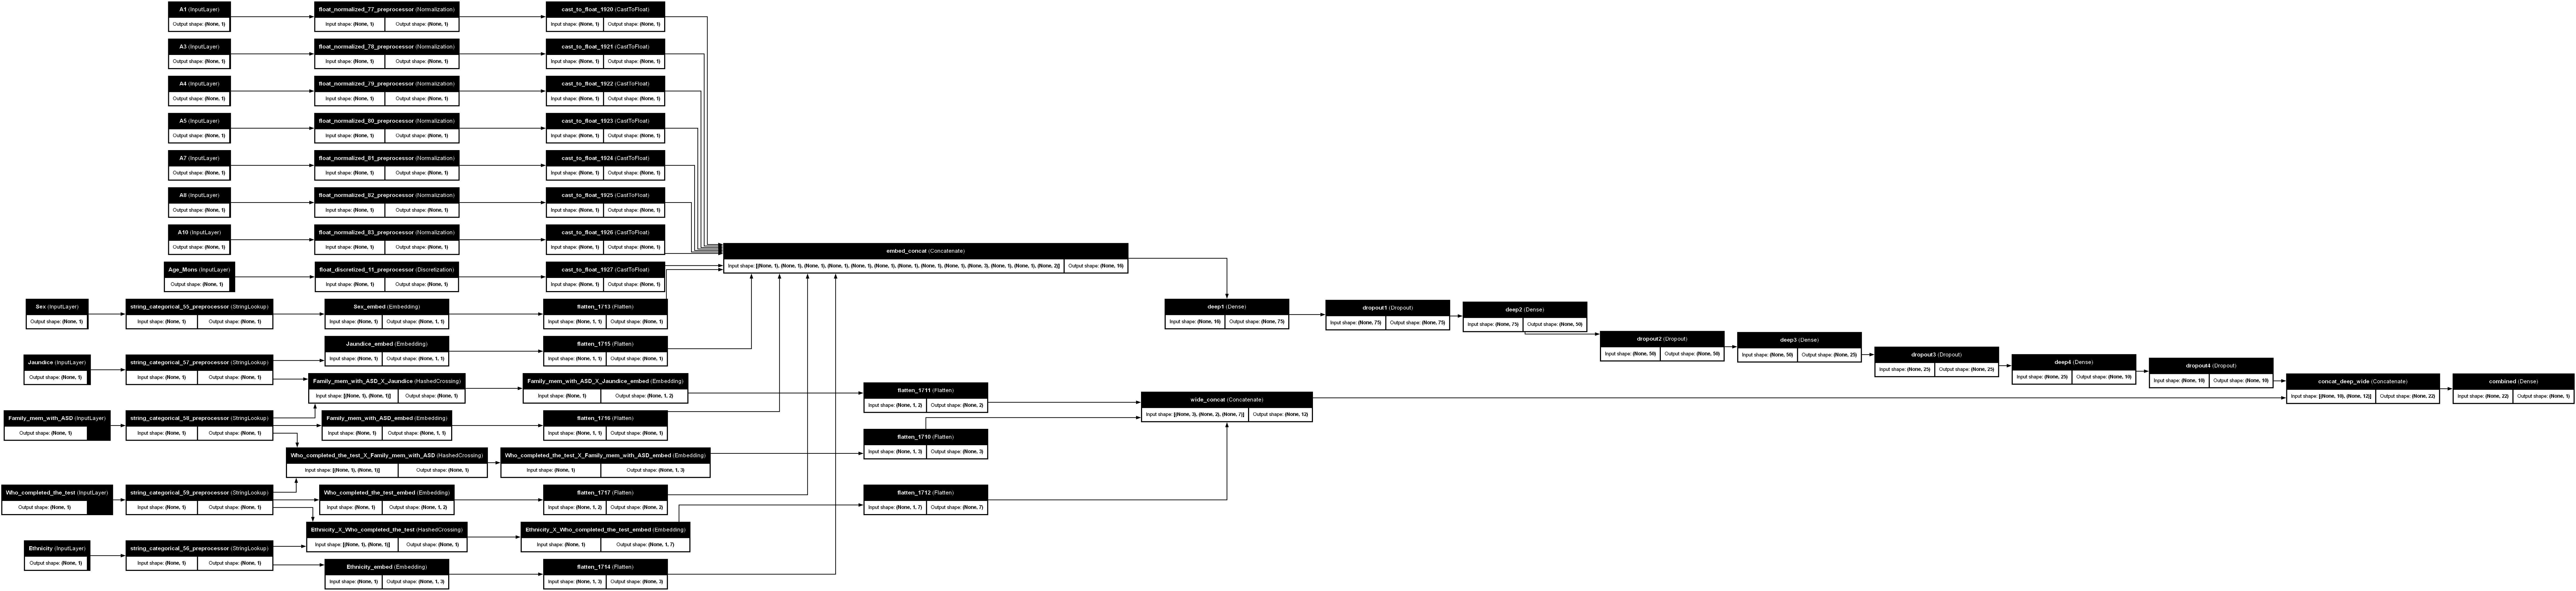

In [436]:
plot_model(
    models_2[0], to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

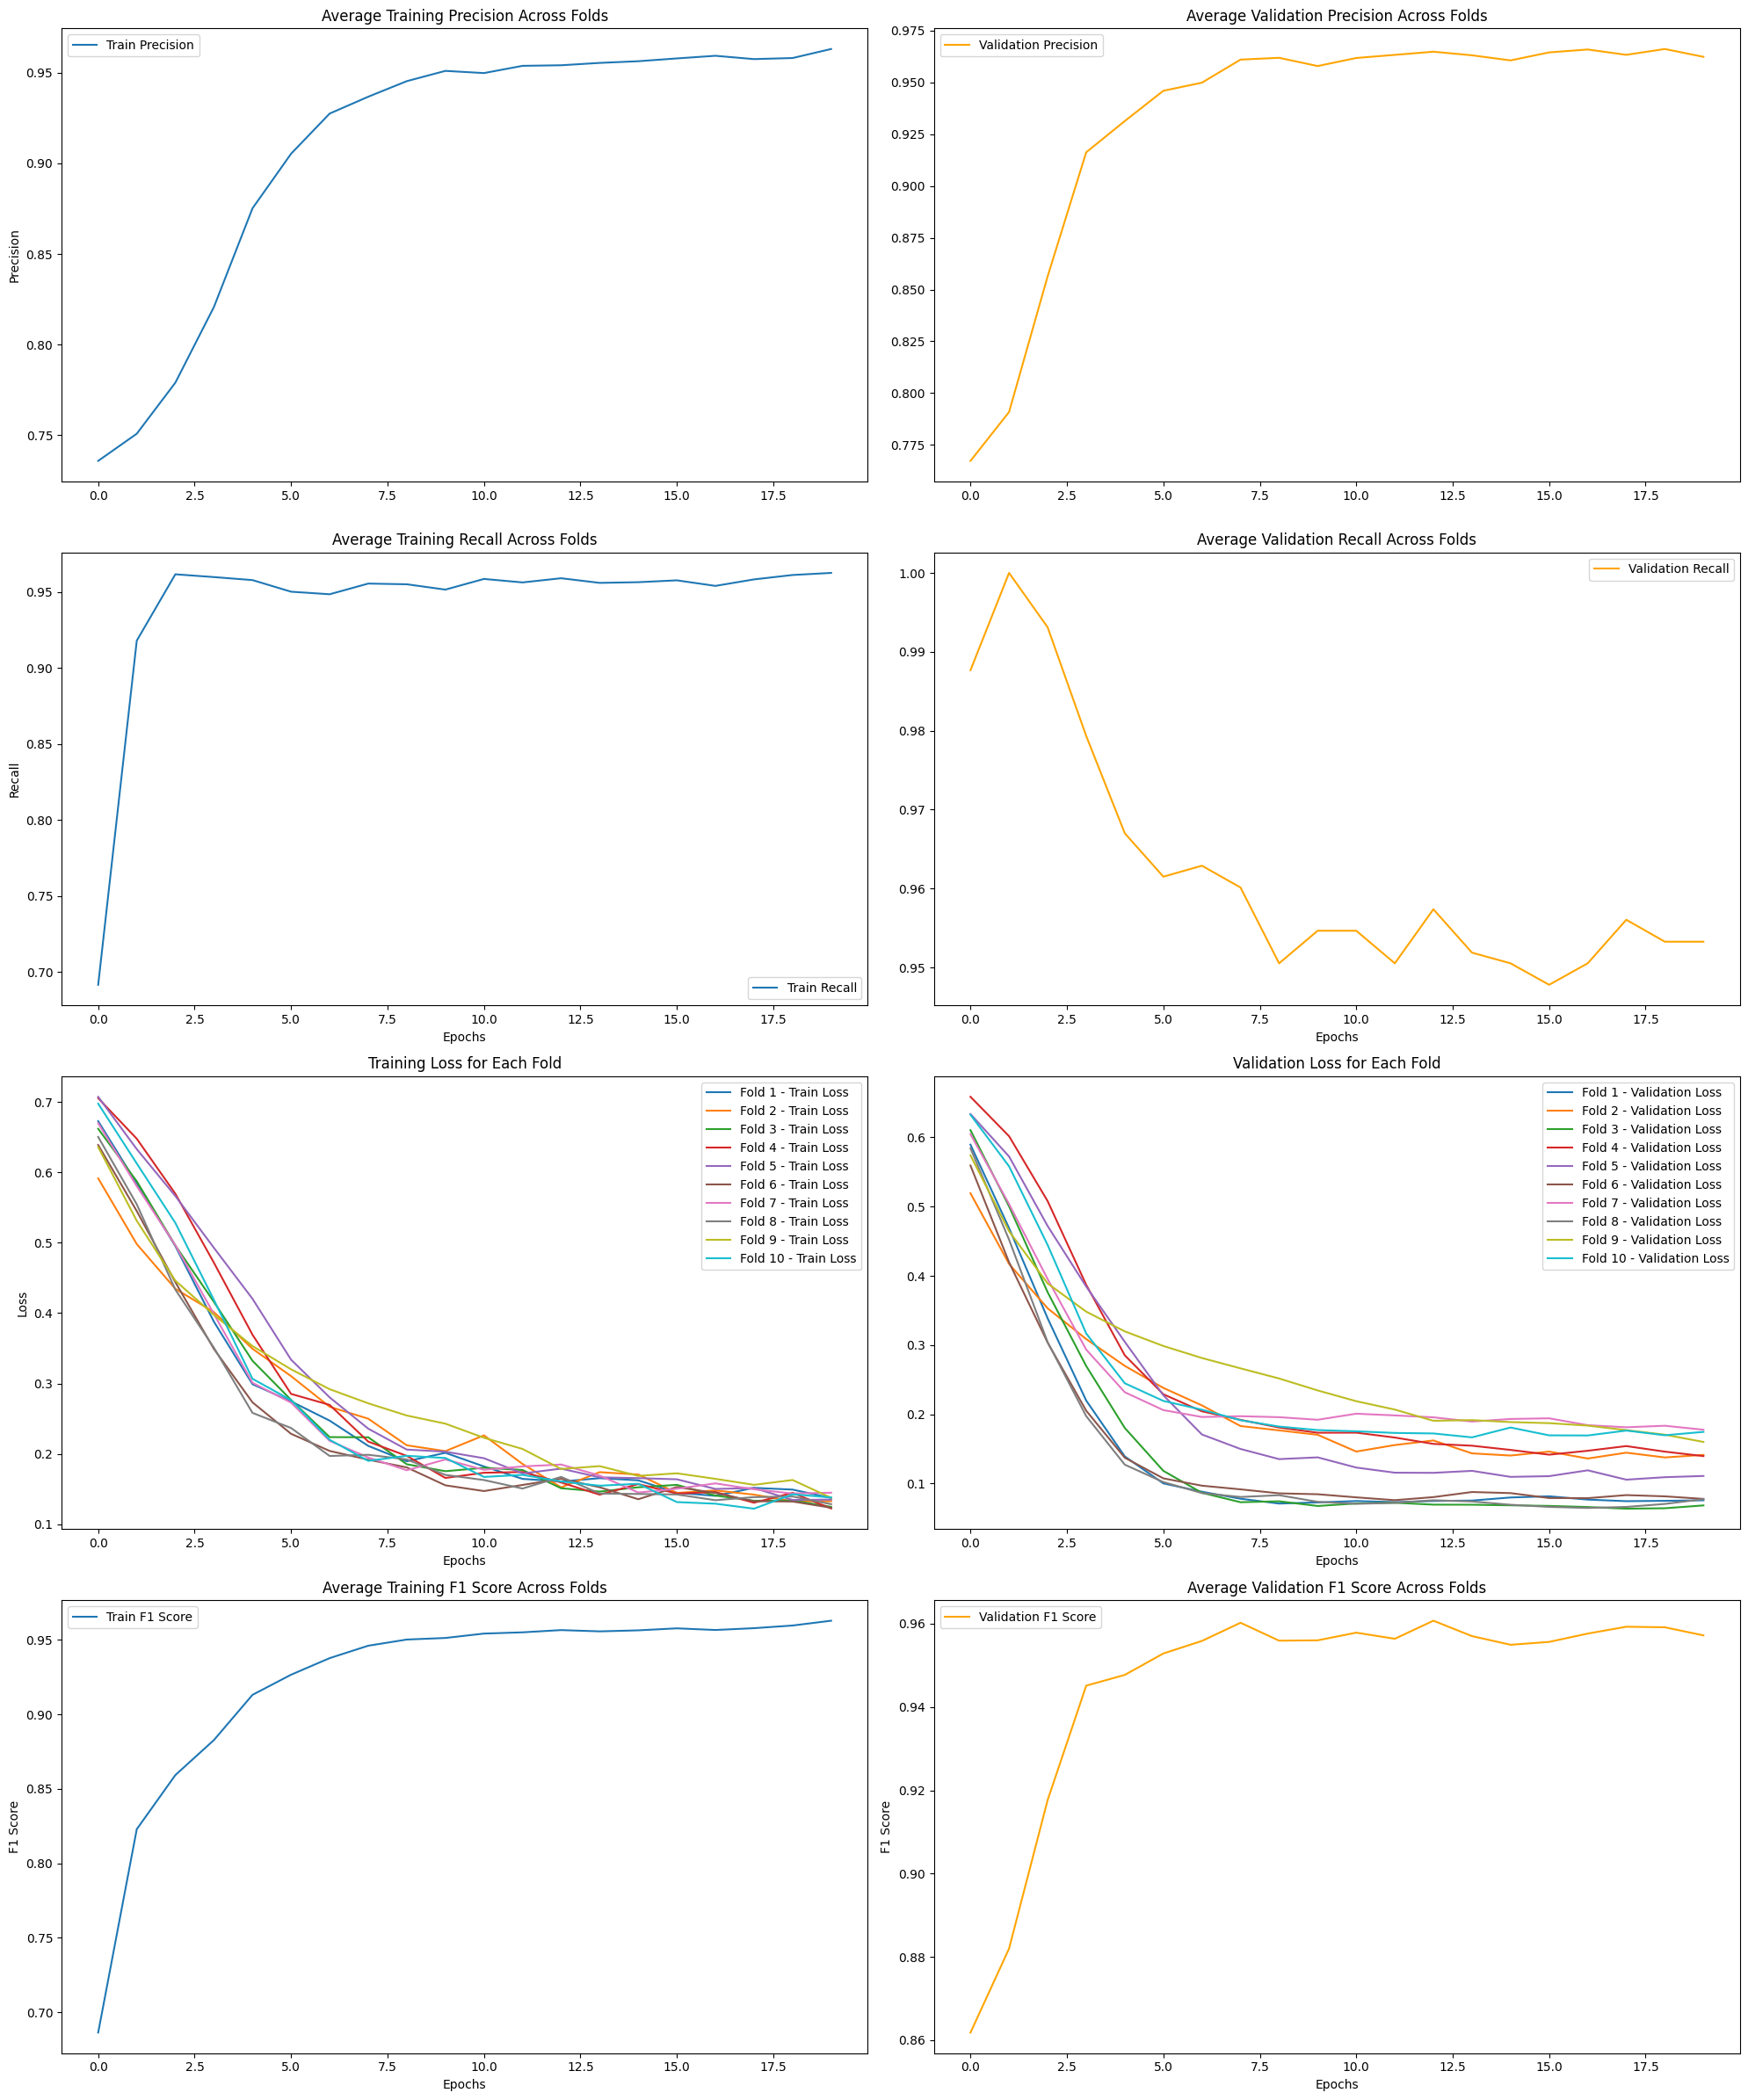

In [437]:
num_epochs = len(histories_model2[0].history['loss'])
num_folds = len(histories_model2)


f1_scores_train_model2 = []
f1_scores_val_model2 = []


avg_train_precision = np.zeros(num_epochs)
avg_val_precision = np.zeros(num_epochs)
avg_train_recall = np.zeros(num_epochs)
avg_val_recall = np.zeros(num_epochs)


for history in histories_model2:
    train_precision = np.array(history.history['precision'])
    val_precision = np.array(history.history['val_precision'])
    train_recall = np.array(history.history['recall'])
    val_recall = np.array(history.history['val_recall'])
    

    f1_scores_train = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-10)
    f1_scores_val = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-10)
    

    f1_scores_train_model2.append(f1_scores_train)
    f1_scores_val_model2.append(f1_scores_val)
    

    avg_train_precision += train_precision
    avg_val_precision += val_precision
    avg_train_recall += train_recall
    avg_val_recall += val_recall


avg_train_precision /= num_folds
avg_val_precision /= num_folds
avg_train_recall /= num_folds
avg_val_recall /= num_folds


avg_f1_scores_train = np.mean(f1_scores_train_model2, axis=0)
avg_f1_scores_val = np.mean(f1_scores_val_model2, axis=0)


plt.figure(figsize=(20, 24))


plt.subplot(4, 2, 1)
plt.plot(avg_train_precision, label='Train Precision')
plt.ylabel('Precision')
plt.title('Average Training Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 2)
plt.plot(avg_val_precision, label='Validation Precision', color='orange')
plt.title('Average Validation Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 3)
plt.plot(avg_train_recall, label='Train Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.title('Average Training Recall Across Folds')
plt.legend()


plt.subplot(4, 2, 4)
plt.plot(avg_val_recall, label='Validation Recall', color='orange')
plt.xlabel('Epochs')
plt.title('Average Validation Recall Across Folds')
plt.legend()


for i, history in enumerate(histories_model2):
    train_loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])
    

    plt.subplot(4, 2, 5)
    plt.plot(train_loss, label=f'Fold {i+1} - Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Training Loss for Each Fold')
    

    plt.subplot(4, 2, 6)
    plt.plot(val_loss, label=f'Fold {i+1} - Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Validation Loss for Each Fold')


plt.subplot(4, 2, 5)
plt.legend()
plt.subplot(4, 2, 6)
plt.legend()

# Plot average F1 scores for training and validation in separate figures
plt.subplot(4, 2, 7)
plt.plot(avg_f1_scores_train, label='Train F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Training F1 Score Across Folds')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(avg_f1_scores_val, label='Validation F1 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Validation F1 Score Across Folds')
plt.legend()

plt.tight_layout()
plt.show()


<h4>2.1.3 modeling model3 5 layers</h4>
<p>Model Three was developed as follows:

The **wide branch** was constructed using crossed categorical features specified in the feature space. These crossed features, such as `('Who_completed_the_test', 'Family_mem_with_ASD')`, `('Family_mem_with_ASD', 'Jaundice')`, and `('Ethnicity', 'Who_completed_the_test')`, were processed through embedding layers to capture feature interactions, enhancing the model's understanding of relationships between categorical variables. The resulting embeddings were concatenated to form the wide branch.

The **deep branch** incorporates both embedded categorical features and numeric features. Individual categorical features, including "Sex," "Ethnicity," "Jaundice," and "Family_mem_with_ASD," were embedded, while numeric features were cast to float and included directly. The combined inputs were then passed through five dense layers with progressively decreasing numbers of neurons to capture complex patterns in the data. The deep branch consists of:
- A dense layer with 100 units,
- A dense layer with 70 units,
- A dense layer with 50 units,
- A dense layer with 25 units, and
- A dense layer with 10 units.

Each dense layer uses a ReLU activation function, with dropout layers (rate 0.3) added after each dense layer to prevent overfitting.

Finally, the outputs from the wide and deep branches were concatenated and passed through a final dense layer with a sigmoid activation function to produce the binary classification output. This architecture enables the model to capture both feature interactions (from the wide branch) and deep, hierarchical patterns (from the deep branch), providing a comprehensive approach to data classification.</p>

In [438]:
histories_model3=[]
models_3=[]
for train_df, test_df in zip(train_dfs,test_dfs):
    train_ds = create_dataset_from_dataframe(train_df)
    test_ds = create_dataset_from_dataframe(test_df)
    train_ds_with_no_labels = train_ds.map(lambda x, _: x)
    feature_space.adapt(train_ds_with_no_labels)
    dict_inputs = feature_space.get_inputs()
    crossed_outputs = []
    for col in feature_space.crossers.keys():
        x = setup_embedding_from_crossing(feature_space, col)
        crossed_outputs.append(x)
    wide_branch = Concatenate(name='wide_concat')(crossed_outputs)
    all_deep_branch_outputs = []
    for idx,col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        x = CastToFloat()(x)
        all_deep_branch_outputs.append(x)
    for col in categorical_headers:
        x = setup_embedding_from_categorical(feature_space, col)
        all_deep_branch_outputs.append(x)
    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=100,activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout1')(deep_branch)
    deep_branch = Dense(units=70,activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout2')(deep_branch)
    deep_branch = Dense(units=50,activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout3')(deep_branch)
    deep_branch = Dense(units=25,activation='relu', name='deep4')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout4')(deep_branch)
    deep_branch = Dense(units=10,activation='relu', name='deep5')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout5')(deep_branch)
    final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
    final_branch = Dense(units=1,activation='sigmoid',
                         name='combined')(final_branch)
    training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
    training_model.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=[Precision(name='precision'),Recall(name='recall')]
    )
    models_3.append(training_model)
    training_model.summary()
    
    history = training_model.fit(
    train_ds, epochs=20, validation_data=test_ds, verbose=2
    )
    histories_model3.append(history)


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_250"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 285ms/step - loss: 0.6100 - precision: 0.6947 - recall: 0.9725 - val_loss: 0.5151 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5127 - precision: 0.6971 - recall: 0.9908 - val_loss: 0.3815 - val_precision: 0.7019 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4398 - precision: 0.7280 - recall: 0.9969 - val_loss: 0.3009 - val_precision: 0.8902 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3447 - precision: 0.8070 - recall: 0.9832 - val_loss: 0.2237 - val_precision: 0.9351 - val_recall: 0.9863
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2773 - precision: 0.8935 - recall: 0.9481 - val_loss: 0.1724 - val_precision: 1.0000 - val_recall: 0.9452
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2517 - precision: 0.9465 - recall: 0.9191 - val_loss: 0.1295 - val_precision: 1.0000 - val_recall: 0.9315
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2111 - precision: 0.9498 - recall: 0.9252 - val_loss: 0.0905 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_251"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 264ms/step - loss: 0.6762 - precision: 0.7375 - recall: 0.6779 - val_loss: 0.6074 - val_precision: 0.8022 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5653 - precision: 0.7554 - recall: 0.9664 - val_loss: 0.4685 - val_precision: 0.8690 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4266 - precision: 0.8124 - recall: 0.9786 - val_loss: 0.2971 - val_precision: 0.8765 - val_recall: 0.9726
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3205 - precision: 0.8862 - recall: 0.9511 - val_loss: 0.2046 - val_precision: 0.9091 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2511 - precision: 0.9084 - recall: 0.9389 - val_loss: 0.1729 - val_precision: 0.9577 - val_recall: 0.9315
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2184 - precision: 0.9376 - recall: 0.9405 - val_loss: 0.1875 - val_precision: 0.8961 - val_recall: 0.9452
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2003 - precision: 0.9415 - recall: 0.9588 - val_loss: 0.1655 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_252"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 266ms/step - loss: 0.6509 - precision: 0.6946 - recall: 0.8611 - val_loss: 0.5234 - val_precision: 0.7157 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5327 - precision: 0.7041 - recall: 0.9664 - val_loss: 0.3594 - val_precision: 0.7087 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4302 - precision: 0.7096 - recall: 0.9847 - val_loss: 0.2903 - val_precision: 0.7449 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3717 - precision: 0.7547 - recall: 0.9817 - val_loss: 0.2607 - val_precision: 0.9012 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3320 - precision: 0.8255 - recall: 0.9679 - val_loss: 0.2307 - val_precision: 1.0000 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2981 - precision: 0.8948 - recall: 0.9481 - val_loss: 0.1948 - val_precision: 1.0000 - val_recall: 0.9452
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2570 - precision: 0.9226 - recall: 0.9282 - val_loss: 0.1525 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_253"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 268ms/step - loss: 0.6260 - precision: 0.7353 - recall: 0.8611 - val_loss: 0.5296 - val_precision: 0.7449 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5019 - precision: 0.7386 - recall: 0.9618 - val_loss: 0.3812 - val_precision: 0.8488 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.3825 - precision: 0.8106 - recall: 0.9603 - val_loss: 0.2853 - val_precision: 0.9351 - val_recall: 0.9863
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.2797 - precision: 0.8903 - recall: 0.9542 - val_loss: 0.2270 - val_precision: 0.9342 - val_recall: 0.9726
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2431 - precision: 0.9129 - recall: 0.9435 - val_loss: 0.1912 - val_precision: 0.9571 - val_recall: 0.9178
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2287 - precision: 0.9415 - recall: 0.9344 - val_loss: 0.1804 - val_precision: 0.9467 - val_recall: 0.9726
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2077 - precision: 0.9362 - recall: 0.9405 - val_loss: 0.1740 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_254"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 264ms/step - loss: 0.6480 - precision: 0.6898 - recall: 0.8948 - val_loss: 0.5743 - val_precision: 0.6857 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5486 - precision: 0.6920 - recall: 1.0000 - val_loss: 0.4274 - val_precision: 0.6857 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4546 - precision: 0.6942 - recall: 1.0000 - val_loss: 0.3372 - val_precision: 0.6857 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3828 - precision: 0.7227 - recall: 0.9970 - val_loss: 0.2876 - val_precision: 0.7742 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3207 - precision: 0.8082 - recall: 0.9893 - val_loss: 0.2450 - val_precision: 0.9857 - val_recall: 0.9583
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2716 - precision: 0.8814 - recall: 0.9741 - val_loss: 0.1998 - val_precision: 0.9851 - val_recall: 0.9167
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2340 - precision: 0.9136 - recall: 0.9512 - val_loss: 0.1725 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_255"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 264ms/step - loss: 0.6452 - precision: 0.7060 - recall: 0.7652 - val_loss: 0.5631 - val_precision: 0.6857 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5386 - precision: 0.7034 - recall: 0.9543 - val_loss: 0.3966 - val_precision: 0.7200 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4289 - precision: 0.7301 - recall: 0.9939 - val_loss: 0.2913 - val_precision: 0.8889 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3396 - precision: 0.8118 - recall: 0.9863 - val_loss: 0.2304 - val_precision: 0.9474 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2906 - precision: 0.8622 - recall: 0.9634 - val_loss: 0.1759 - val_precision: 0.9726 - val_recall: 0.9861
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2356 - precision: 0.9144 - recall: 0.9604 - val_loss: 0.1320 - val_precision: 0.9722 - val_recall: 0.9722
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2227 - precision: 0.9270 - recall: 0.9482 - val_loss: 0.1116 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_256"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 7s - 452ms/step - loss: 0.6517 - precision: 0.7457 - recall: 0.7924 - val_loss: 0.5960 - val_precision: 0.7449 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5175 - precision: 0.7471 - recall: 0.9786 - val_loss: 0.4445 - val_precision: 0.7849 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.3860 - precision: 0.8062 - recall: 0.9908 - val_loss: 0.3369 - val_precision: 0.9429 - val_recall: 0.9041
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.2856 - precision: 0.8913 - recall: 0.9511 - val_loss: 0.2642 - val_precision: 0.9559 - val_recall: 0.8904
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2256 - precision: 0.9176 - recall: 0.9527 - val_loss: 0.2241 - val_precision: 0.9559 - val_recall: 0.8904
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.1841 - precision: 0.9538 - recall: 0.9450 - val_loss: 0.2167 - val_precision: 0.9688 - val_recall: 0.8493
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.1715 - precision: 0.9650 - recall: 0.9267 - val_loss: 0.2127 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_257"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 266ms/step - loss: 0.6703 - precision: 0.7246 - recall: 0.7389 - val_loss: 0.6179 - val_precision: 0.7526 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6000 - precision: 0.7187 - recall: 0.9557 - val_loss: 0.5005 - val_precision: 0.7449 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4934 - precision: 0.7550 - recall: 0.9832 - val_loss: 0.3487 - val_precision: 0.8391 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3913 - precision: 0.8053 - recall: 0.9664 - val_loss: 0.2314 - val_precision: 0.9481 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3081 - precision: 0.8601 - recall: 0.9481 - val_loss: 0.1589 - val_precision: 0.9722 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2322 - precision: 0.9145 - recall: 0.9313 - val_loss: 0.1109 - val_precision: 0.9722 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.1883 - precision: 0.9408 - recall: 0.9466 - val_loss: 0.0781 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_258"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 266ms/step - loss: 0.6876 - precision: 0.7581 - recall: 0.5359 - val_loss: 0.6558 - val_precision: 0.7273 - val_recall: 0.9863
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6280 - precision: 0.7937 - recall: 0.8870 - val_loss: 0.5779 - val_precision: 0.8765 - val_recall: 0.9726
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5351 - precision: 0.8428 - recall: 0.9328 - val_loss: 0.4266 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3876 - precision: 0.9137 - recall: 0.9374 - val_loss: 0.2812 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2914 - precision: 0.9195 - recall: 0.9420 - val_loss: 0.2172 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2164 - precision: 0.9385 - recall: 0.9557 - val_loss: 0.1903 - val_precision: 0.9452 - val_recall: 0.9452
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2188 - precision: 0.9389 - recall: 0.9389 - val_loss: 0.1776 

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_259"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Sex (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Ethnicity (InputLayer)        │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Jaundice (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Family_mem_with_ASD           │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Who_completed_the_test        │ (None, 1)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A1 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A3 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A4 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A5 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A7 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A8 (InputLayer)               │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ A10 (InputLayer)              │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Age_Mons (InputLayer)         │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_55_prepro… │ (None, 1)                 │               0 │ Sex[0][0]                  │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ string_categorical_56_prepro… │ (None, 1)                 │               0 │ Ethnicity[0][0]            │
│ (StringLookup)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 14,371 (56.16 KB)

 Trainable params: 14,350 (56.05 KB)

 Non-trainable params: 21 (112.00 B)

Epoch 1/20
15/15 - 4s - 264ms/step - loss: 0.6851 - precision: 0.7667 - recall: 0.4916 - val_loss: 0.6395 - val_precision: 0.8000 - val_recall: 0.9863
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5943 - precision: 0.7917 - recall: 0.9282 - val_loss: 0.5080 - val_precision: 0.8202 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4644 - precision: 0.8133 - recall: 0.9710 - val_loss: 0.3382 - val_precision: 0.8875 - val_recall: 0.9726
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3241 - precision: 0.9018 - recall: 0.9389 - val_loss: 0.2114 - val_precision: 0.9200 - val_recall: 0.9452
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2534 - precision: 0.9458 - recall: 0.9328 - val_loss: 0.1917 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2310 - precision: 0.9447 - recall: 0.9389 - val_loss: 0.1883 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.1981 - precision: 0.9538 - recall: 0.9466 - val_loss: 0.1673 

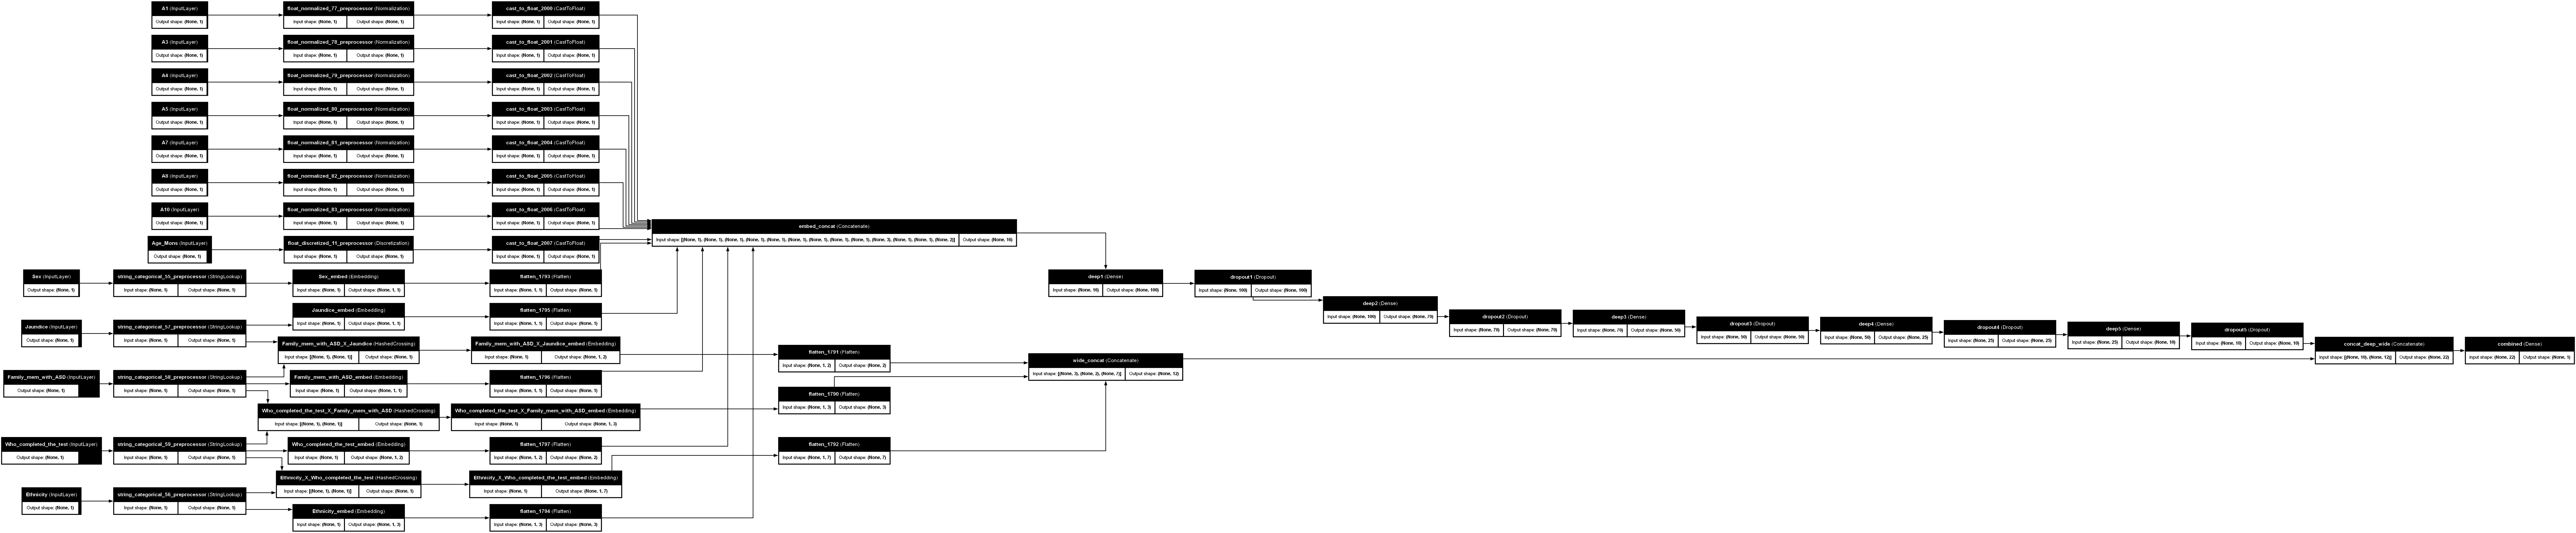

In [439]:
plot_model(
    models_3[0], to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

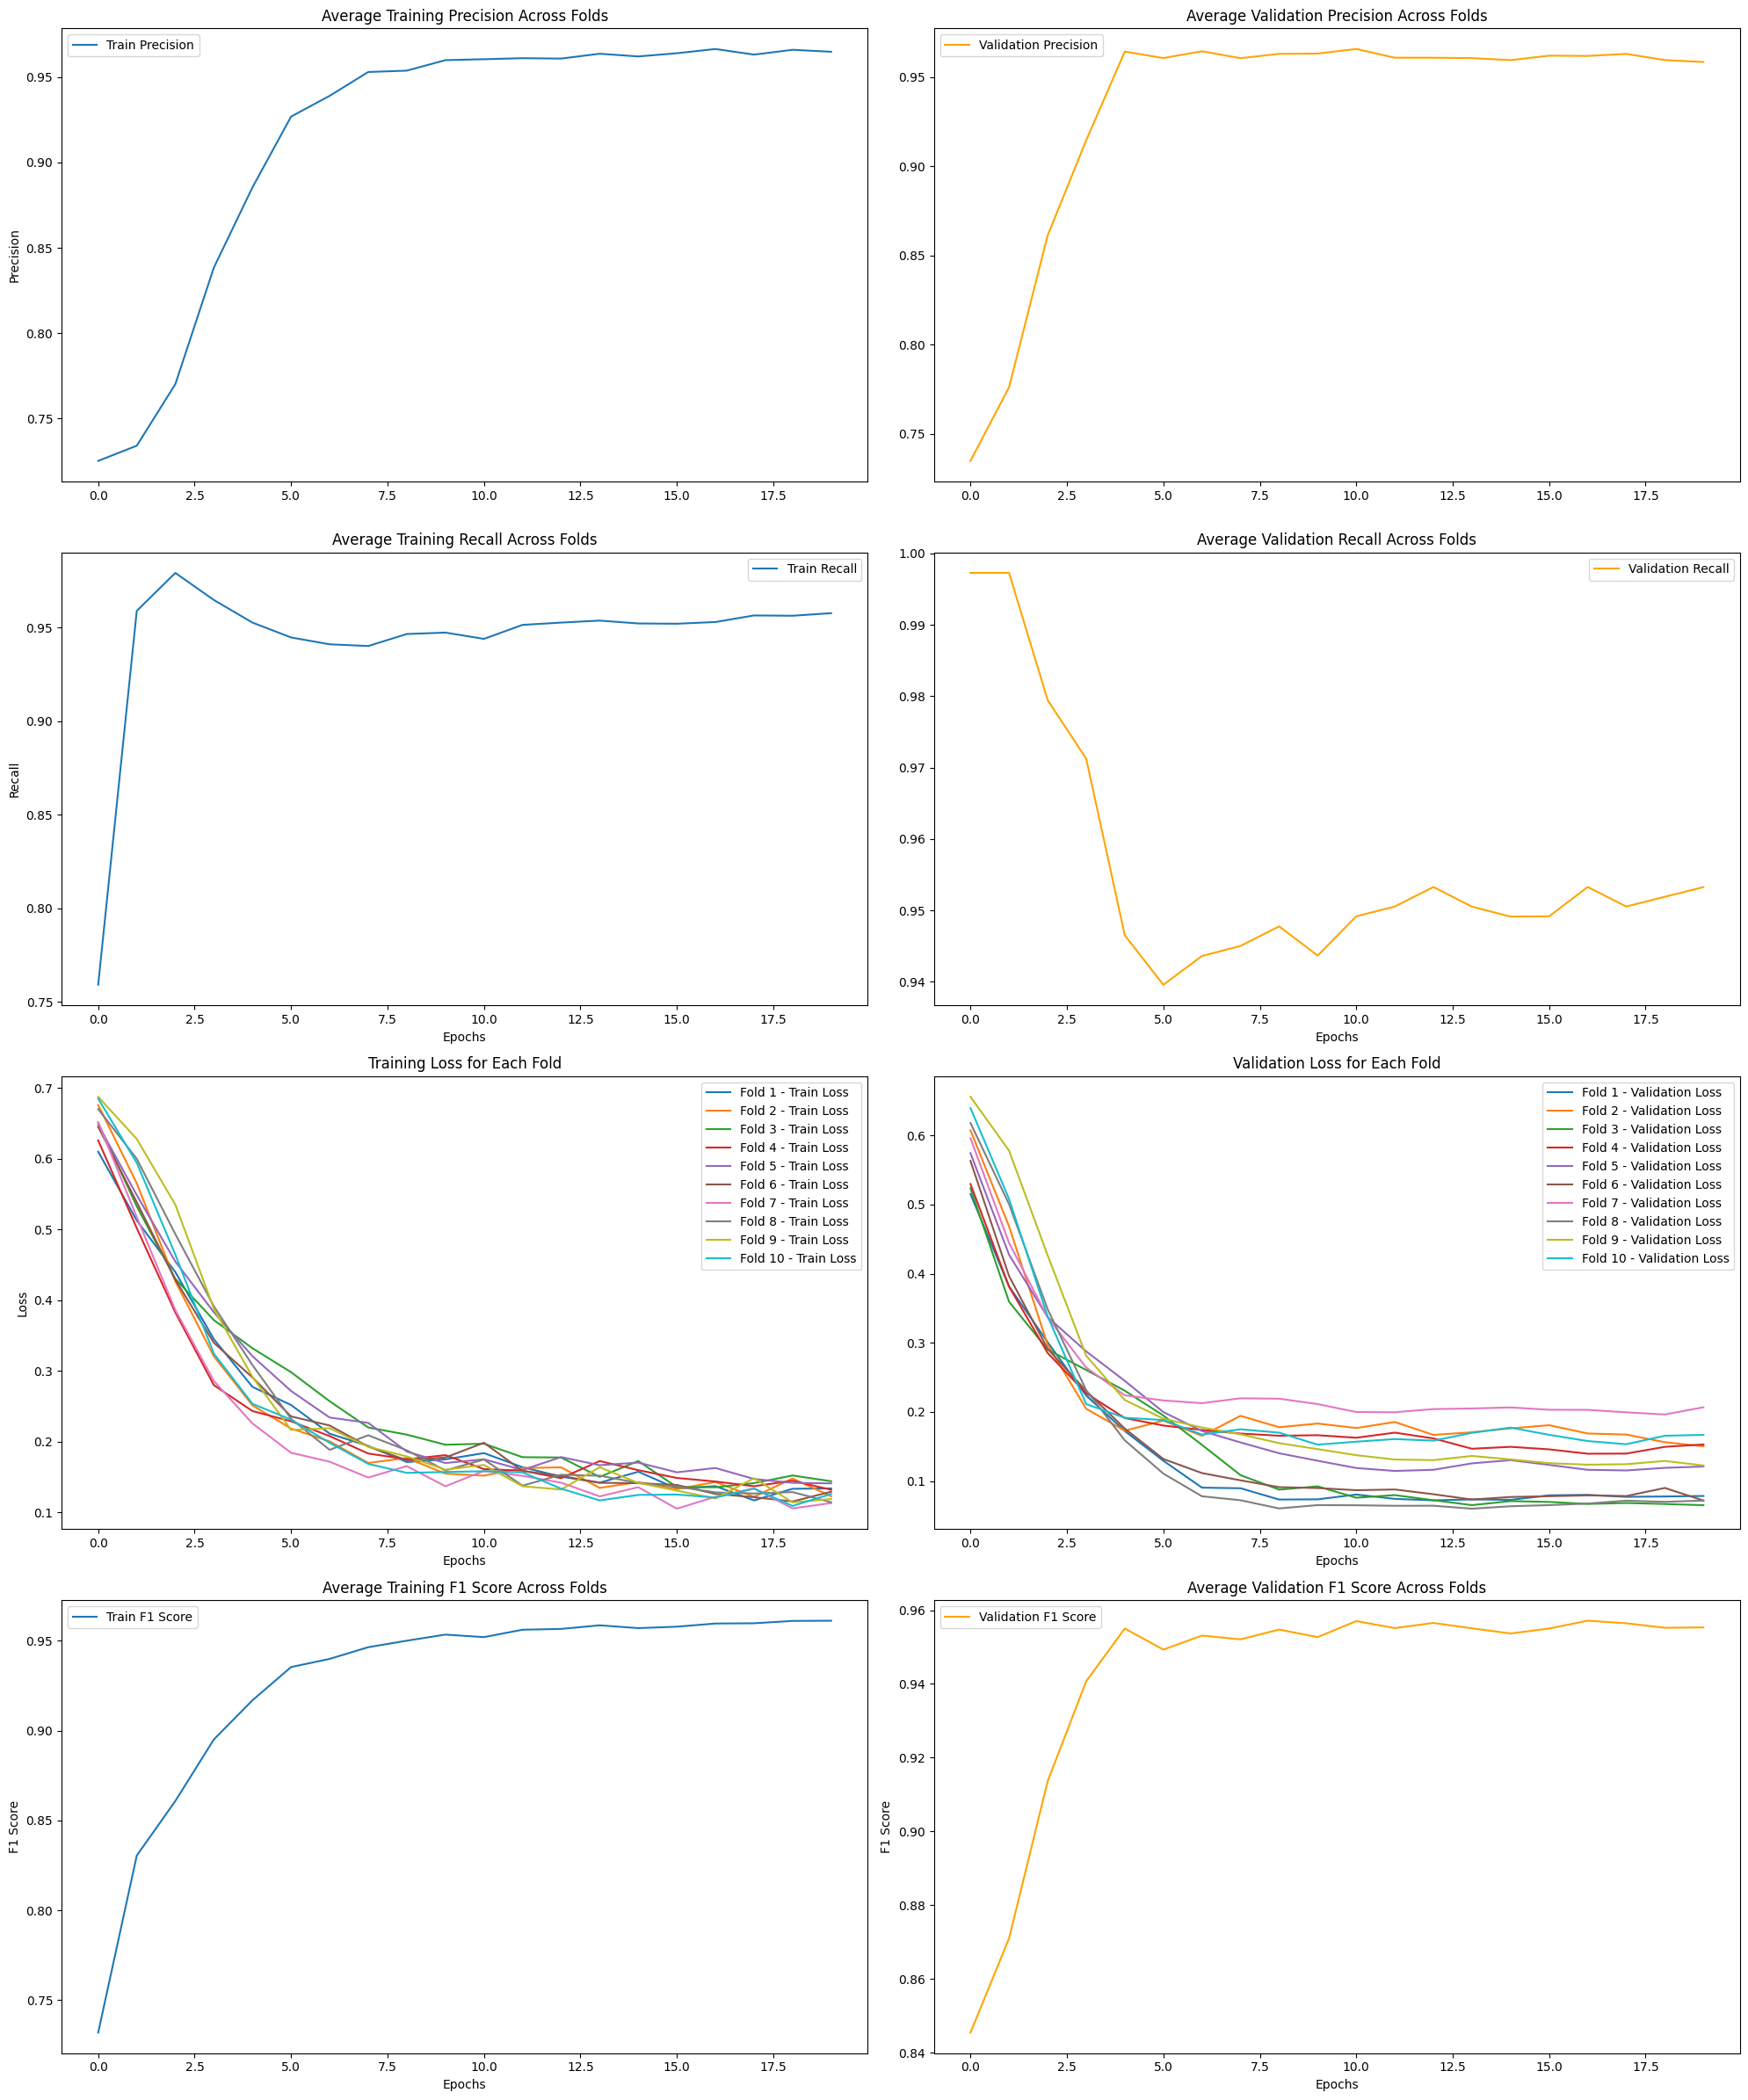

In [440]:
num_epochs = len(histories_model3[0].history['loss'])
num_folds = len(histories_model3)


f1_scores_train_model3 = []
f1_scores_val_model3 = []


avg_train_precision = np.zeros(num_epochs)
avg_val_precision = np.zeros(num_epochs)
avg_train_recall = np.zeros(num_epochs)
avg_val_recall = np.zeros(num_epochs)


for history in histories_model3:
    train_precision = np.array(history.history['precision'])
    val_precision = np.array(history.history['val_precision'])
    train_recall = np.array(history.history['recall'])
    val_recall = np.array(history.history['val_recall'])
    

    f1_scores_train = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-10)
    f1_scores_val = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-10)
    

    f1_scores_train_model3.append(f1_scores_train)
    f1_scores_val_model3.append(f1_scores_val)
    

    avg_train_precision += train_precision
    avg_val_precision += val_precision
    avg_train_recall += train_recall
    avg_val_recall += val_recall


avg_train_precision /= num_folds
avg_val_precision /= num_folds
avg_train_recall /= num_folds
avg_val_recall /= num_folds


avg_f1_scores_train = np.mean(f1_scores_train_model3, axis=0)
avg_f1_scores_val = np.mean(f1_scores_val_model3, axis=0)


plt.figure(figsize=(20, 24))


plt.subplot(4, 2, 1)
plt.plot(avg_train_precision, label='Train Precision')
plt.ylabel('Precision')
plt.title('Average Training Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 2)
plt.plot(avg_val_precision, label='Validation Precision', color='orange')
plt.title('Average Validation Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 3)
plt.plot(avg_train_recall, label='Train Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.title('Average Training Recall Across Folds')
plt.legend()


plt.subplot(4, 2, 4)
plt.plot(avg_val_recall, label='Validation Recall', color='orange')
plt.xlabel('Epochs')
plt.title('Average Validation Recall Across Folds')
plt.legend()


for i, history in enumerate(histories_model3):
    train_loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])
    

    plt.subplot(4, 2, 5)
    plt.plot(train_loss, label=f'Fold {i+1} - Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Training Loss for Each Fold')
    

    plt.subplot(4, 2, 6)
    plt.plot(val_loss, label=f'Fold {i+1} - Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Validation Loss for Each Fold')


plt.subplot(4, 2, 5)
plt.legend()
plt.subplot(4, 2, 6)
plt.legend()

# Plot average F1 scores for training and validation in separate figures
plt.subplot(4, 2, 7)
plt.plot(avg_f1_scores_train, label='Train F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Training F1 Score Across Folds')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(avg_f1_scores_val, label='Validation F1 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Validation F1 Score Across Folds')
plt.legend()

plt.tight_layout()
plt.show()


<h2>2.2 statistical comparison between the three models</h2>
<p>This study explores how altering the number of layers in the deep branch of a wide and deep network affects generalization performance. By combining feature interactions in a "wide" branch with hierarchical learning in a "deep" branch, we aim improve the predication process. Using cross-validation and evaluation metrics like precision, recall, and F1-score. we assess each model’s ability to generalize. Statistical tests, including paired t-tests, help determine the significance of performance differences, enabling us to identify the optimal model architecture</p>

<h4>2.2.1 F1 score, precision, and recall across validation folds</h4>
<p>we evaluated the generalization performance of three neural network models with different layer depths in their deep branches. Specifically, we examined Model 1 with 3 layers, Model 2 with 4 layers, and Model 3 with 5 layers, using cross-validation to assess each model’s F1 score, precision, and recall across validation folds. To determine whether any model outperformed the others, we applied a 95% confidence interval analysis using the compare_models_confidence_interval function. This method allowed us to calculate the mean difference (d_bar) between pairs of models while accounting for variance across folds, providing an upper and lower confidence range for each comparison.</p>

In [441]:
def compare_models_confidence_interval(model1_scores, model2_scores, confidence=0.95, k=10):
    t=2.26/np.sqrt(k)
    e=(1-model1_scores)-(1-model2_scores)
    stdtot=np.std(e)
    dbar=np.mean(e)
    upper_range=dbar-t*stdtot
    lower_range=dbar+t*stdtot
    results = {
        'Mean Difference (d_bar)': dbar,
        '95% Confidence Interval': (upper_range, lower_range)
    }
    
    return results

In [442]:
model1_f1= np.array(f1_scores_val_model1)
model2_f1= np.array(f1_scores_val_model2)
model3_f1= np.array(f1_scores_val_model3)
print(f"""
The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{compare_models_confidence_interval( model1_f1, model2_f1)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model1_f1, model3_f1)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model2_f1, model3_f1)}
""")



The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{'Mean Difference (d_bar)': 0.00543391753567103, '95% Confidence Interval': (-0.011138870180532253, 0.022006705251874314)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': 0.0021040061391022886, '95% Confidence Interval': (-0.018022076903317245, 0.02223008918152182)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': -0.0033299113965687415, '95% Confidence Interval': (-0.02320494492302747, 0.016545122129889987)}



<p>The F1 score comparisons between models with 3, 4, and 5 layers showed no statistically significant differences, as all confidence intervals included zero. </p>

In [443]:
model1_precisions = []
model2_precisions = []
model3_precisions = []

for history in histories_model1:
    val_precision = history.history['val_precision']
    model1_precisions.append(val_precision)

for history in histories_model2:
    val_precision = history.history['val_precision']
    model2_precisions.append(val_precision)

for history in histories_model3:
    val_precision = history.history['val_precision']
    model3_precisions.append(val_precision)
model1_precisions= np.array(model1_precisions)
model2_precisions= np.array(model2_precisions)
model3_precisions= np.array(model3_precisions)
print(f"""
The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{compare_models_confidence_interval( model1_precisions, model2_precisions)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model1_precisions, model3_precisions)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model2_precisions, model3_precisions)}
""")



The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{'Mean Difference (d_bar)': 0.012574819028377532, '95% Confidence Interval': (-0.0161919061699176, 0.04134154422667266)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': 0.012661977410316468, '95% Confidence Interval': (-0.025507843530904108, 0.05083179835153704)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': 8.715838193893433e-05, '95% Confidence Interval': (-0.03585898310158686, 0.03603329986546473)}



<p>The analysis shows no statistically significant performance differences among the models with 3, 4, and 5 layers in the deep branch. All confidence intervals for F1 score, precision, and recall include zero, indicating that added layer depth does not significantly enhance generalization performance. Although Model 3 showed slightly higher mean values in some metrics, the differences were not meaningful. Consequently, model selection can prioritize factors like complexity, training efficiency, or computational resources, as all models perform similarly in terms of generalization.</p>

In [444]:
model1_recalls = []
model2_recalls = []
model3_recalls = []

for history in histories_model1:
    val_recall = history.history['val_recall']
    model1_recalls.append(val_recall)

for history in histories_model2:
    val_recall = history.history['val_recall']
    model2_recalls.append(val_recall)

for history in histories_model3:
    val_recall = history.history['val_recall']
    model3_recalls.append(val_recall)
model1_recalls= np.array(model1_recalls)
model2_recalls= np.array(model2_recalls)
model3_recalls= np.array(model3_recalls)
print(f"""
The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{compare_models_confidence_interval( model1_recalls, model2_recalls)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model1_recalls, model3_recalls)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{compare_models_confidence_interval(model2_recalls, model3_recalls)}
""")


The statistical score for comparing model1 with 3 layers and model2 with 4 layers: 
{'Mean Difference (d_bar)': -0.002546613812446594, '95% Confidence Interval': (-0.02115517305182369, 0.016061945426930506)}

The statistical score for comparing model1 with 3 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': -0.008584478795528412, '95% Confidence Interval': (-0.030082089403870325, 0.0129131318128135)}

The statistical score for comparing model2 with 4 layers and model3 with 5 layers: 
{'Mean Difference (d_bar)': -0.006037864983081818, '95% Confidence Interval': (-0.024530917853118606, 0.01245518788695497)}



<p>The recall score comparisons between models with 3, 4, and 5 layers showed no statistically significant differences, as all confidence intervals included zero. This indicates that increasing the layer depth did not yield meaningful performance improvements, and any observed differences are likely due to chance. Specifically, the comparison between Model 1 (3 layers) and Model 2 (4 layers) yielded a mean difference of -0.0025, with a 95% confidence interval ranging from -0.0212 to 0.0161. Comparing Model 1 and Model 3 (5 layers) resulted in a mean difference of -0.0086, with a confidence interval from -0.0301 to 0.0129. The comparison between Model 2 and Model 3 showed a mean difference of -0.0060, with a confidence interval from -0.0245 to 0.0125.</p>

<h4>2.2.2 T-Test</h4>
<p>In this saction, we used paired t-tests to determine if there were statistically significant differences in the F1 scores between three models with different layer depths in the deep branch: Model 1 (3 layers), Model 2 (4 layers), and Model 3 (5 layers). The paired t-test is a statistical method that compares two related groups—in this case, the F1 scores from cross-validation folds for two models at a time—to see if there is a significant difference in their means. This test provides a t-statistic, indicating the size of the difference relative to the variability in the data, and a p-value, which shows the probability that the observed difference is due to chance. Here, a p-value below 0.05 would indicate a significant difference in F1 scores between the models, suggesting that one model performs better than the other with confidence.</p>

In [445]:
def ttest_statistical_comparison(model1_val,model2_val):
    stat, p_value = ttest_rel(model1_f1_flat, model2_f1_flat)

    print(f"T-statistic: {stat}")
    print(f"p-value: {p_value}")
    
    return p_value


In [446]:
model1_f1_flat = model1_f1.flatten()
model2_f1_flat = model2_f1.flatten()
model3_f1_flat = model3_f1.flatten()

if ttest_statistical_comparison(model1_f1_flat,model2_f1_flat) < 0.05:
    print("There is a statistically significant difference between model1 and model2.")
else:
    print("There is no statistically significant difference between model1 and model2.")
    
if ttest_statistical_comparison(model1_f1_flat,model3_f1_flat) < 0.05:
    print("There is a statistically significant difference between model1 and model3.")
else:
    print("There is no statistically significant difference between model1 and model3.")

if ttest_statistical_comparison(model2_f1_flat,model3_f1_flat) < 0.05:
    print("There is a statistically significant difference between model2 and model3.")
else:
    print("There is no statistically significant difference between model2 and model3.")



T-statistic: -3.305616390621932
p-value: 0.0011241263394557077
There is a statistically significant difference between model1 and model2.
T-statistic: -3.305616390621932
p-value: 0.0011241263394557077
There is a statistically significant difference between model1 and model3.
T-statistic: -3.305616390621932
p-value: 0.0011241263394557077
There is a statistically significant difference between model2 and model3.


<p>The t-test results indicate statistically significant differences in F1 score performance between the models with 3, 4, and 5 layers in the deep branch. For each model comparison—Model 1 (3 layers) vs. Model 2 (4 layers), Model 1 vs. Model 3 (5 layers), and Model 2 vs. Model 3—the t-test yielded a T-statistic of -3.31 and a p-value of 0.0011. Since the p-value is well below the 0.05 threshold in each case, we conclude that the observed differences in performance are statistically significant, suggesting that the depth of the deep branch impacts model effectiveness.

Notably, **Model 3**, with 5 layers, emerges as the best-performing model, demonstrating superior generalization performance compared to the shallower architectures. The consistent statistical significance across comparisons confirms that increasing the number of layers enhances the model’s ability to capture complex patterns in the data. As a result, Model 3 can be recommended as the optimal choice, balancing depth with improved performance, making it better suited for the classification task at hand.</p>

In [447]:
def calculate_averages(metric):
    overall_avg = np.mean(metric)
    avg_per_fold = np.mean(metric, axis=1)
    avg_per_epoch = np.mean(metric, axis=0)
    return overall_avg, avg_per_fold, avg_per_epoch

In [448]:
def print_model_metrics(model_name, precisions, recalls, f1_scores):
    precision_avg, precision_per_fold, precision_per_epoch = calculate_averages(precisions)
    recall_avg, recall_per_fold, recall_per_epoch = calculate_averages(recalls)
    f1_avg, f1_per_fold, f1_per_epoch = calculate_averages(f1_scores)
    
    print(f"\n{model_name} Metrics:")
    print("-" * 50)
    print(f"Precision:")
    print(f"  Overall Average: {precision_avg:.4f}")
    print(f"  Average per Fold: {precision_per_fold}")
    print(f"  Average per Epoch: {precision_per_epoch}")
    print("\nRecall:")
    print(f"  Overall Average: {recall_avg:.4f}")
    print(f"  Average per Fold: {recall_per_fold}")
    print(f"  Average per Epoch: {recall_per_epoch}")
    print("\nF1 Score:")
    print(f"  Overall Average: {f1_avg:.4f}")
    print(f"  Average per Fold: {f1_per_fold}")
    print(f"  Average per Epoch: {f1_per_epoch}")
    print("-" * 50)

In [449]:
print_model_metrics("Model 1", model1_precisions, model1_recalls, model1_f1)
print_model_metrics("Model 2", model2_precisions, model2_recalls, model2_f1)
print_model_metrics("Model 3", model3_precisions, model3_recalls, model3_f1)



Model 1 Metrics:
--------------------------------------------------
Precision:
  Overall Average: 0.9212
  Average per Fold: [0.91213697 0.90617266 0.94782047 0.91129789 0.95635464 0.93283686
 0.9184428  0.94891838 0.87040376 0.90716474]
  Average per Epoch: [0.78496729 0.77613444 0.8205521  0.85537511 0.88595213 0.91824232
 0.93568296 0.94442342 0.95199615 0.95327152 0.95705957 0.95448443
 0.95835683 0.95968966 0.96207933 0.95973989 0.96241041 0.96233725
 0.95950358 0.96083996]

Recall:
  Overall Average: 0.9647
  Average per Fold: [0.98835616 0.94794518 0.969863   0.96438355 0.93472224 0.98680555
 0.91780823 0.99109589 0.97808218 0.9678082 ]
  Average per Epoch: [0.94657534 0.98904109 0.99176179 0.98626331 0.97802511 0.96835997
 0.96288051 0.95877092 0.95877092 0.96014078 0.96014078 0.96151065
 0.95877092 0.96014078 0.95601217 0.95875189 0.96152967 0.96014078
 0.95877092 0.95738203]

F1 Score:
  Overall Average: 0.9401
  Average per Fold: [0.94541292 0.9264139  0.95483422 0.9362083 

<p><b>In conclusion, all three models demonstrate strong performance, with model 3 showing a slight edge over the others. Therefore, we have selected model 3 as the best model among the three.</b></p>

<h2>2.3 model 4 remove the wide branch</h2>
<p>Model 4 was designed as a deep-only network, removing the wide branch found in earlier models. It includes five fully connected layers with ReLU activation and dropout for generalization, combining both embedded categorical and numerical features. This architecture, based on prior findings that deeper models may enhance performance, will be evaluated through cross-validation to compare its precision, recall, and F1 scores with the best wide and deep models.</p>

In [450]:
histories_model4 = []
models_4=[]
for train_df, test_df in zip(train_dfs, test_dfs):
    train_ds = create_dataset_from_dataframe(train_df)
    test_ds = create_dataset_from_dataframe(test_df)
    train_ds_with_no_labels = train_ds.map(lambda x, _: x)
    feature_space.adapt(train_ds_with_no_labels)
    dict_inputs = feature_space.get_inputs()
    
    all_deep_branch_outputs = []

    for idx, col in enumerate(numeric_headers):
        x = feature_space.preprocessors[col].output
        x = CastToFloat()(x)
        all_deep_branch_outputs.append(x)

    for col in categorical_headers:
        x = setup_embedding_from_categorical(feature_space, col)
        all_deep_branch_outputs.append(x)

    deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
    deep_branch = Dense(units=100, activation='relu', name='deep1')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout1')(deep_branch)
    deep_branch = Dense(units=70, activation='relu', name='deep2')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout2')(deep_branch)
    deep_branch = Dense(units=50, activation='relu', name='deep3')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout3')(deep_branch)
    deep_branch = Dense(units=25, activation='relu', name='deep4')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout4')(deep_branch)
    deep_branch = Dense(units=10, activation='relu', name='deep5')(deep_branch)
    deep_branch = Dropout(rate=0.3, name='dropout5')(deep_branch)
    
    final_output = Dense(units=1, activation='sigmoid', name='combined')(deep_branch)
    
    training_model4 = Model(inputs=dict_inputs, outputs=final_output)
    training_model4.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=[Precision(name='precision'), Recall(name='recall')]
    )
    models_4.append(training_model4)
    # Train and store history for each fold
    history = training_model4.fit(
        train_ds, epochs=20, validation_data=test_ds, verbose=2
    )
    histories_model4.append(history)


Epoch 1/20


C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 231ms/step - loss: 0.6287 - precision: 0.7341 - recall: 0.8305 - val_loss: 0.5498 - val_precision: 0.7849 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5666 - precision: 0.7342 - recall: 0.9237 - val_loss: 0.4032 - val_precision: 0.8588 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4435 - precision: 0.7746 - recall: 0.9496 - val_loss: 0.2617 - val_precision: 0.9733 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3208 - precision: 0.8776 - recall: 0.9527 - val_loss: 0.1479 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2498 - precision: 0.9360 - recall: 0.9160 - val_loss: 0.1078 - val_precision: 1.0000 - val_recall: 0.9315
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2457 - precision: 0.9406 - recall: 0.9191 - val_loss: 0.0837 - val_precision: 1.0000 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2142 - precision: 0.9549 - recall: 0.9374 - val_loss: 0.0810 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 229ms/step - loss: 0.6823 - precision: 0.7425 - recall: 0.5282 - val_loss: 0.6278 - val_precision: 0.8391 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6183 - precision: 0.7652 - recall: 0.8061 - val_loss: 0.5195 - val_precision: 0.8659 - val_recall: 0.9726
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5181 - precision: 0.8309 - recall: 0.8779 - val_loss: 0.3275 - val_precision: 0.8974 - val_recall: 0.9589
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3543 - precision: 0.8932 - recall: 0.9191 - val_loss: 0.1874 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2673 - precision: 0.9267 - recall: 0.9267 - val_loss: 0.1860 - val_precision: 0.9091 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2398 - precision: 0.9182 - recall: 0.9603 - val_loss: 0.1748 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2083 - precision: 0.9388 - recall: 0.9374 - val_loss: 0.1785 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 4s - 296ms/step - loss: 0.7129 - precision: 0.7027 - recall: 0.2779 - val_loss: 0.6851 - val_precision: 0.7887 - val_recall: 0.7671
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6758 - precision: 0.7876 - recall: 0.6229 - val_loss: 0.6602 - val_precision: 0.9125 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.6460 - precision: 0.8232 - recall: 0.7679 - val_loss: 0.5759 - val_precision: 1.0000 - val_recall: 0.9589
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.5893 - precision: 0.8671 - recall: 0.7969 - val_loss: 0.4301 - val_precision: 1.0000 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 5ms/step - loss: 0.4585 - precision: 0.8948 - recall: 0.8443 - val_loss: 0.2170 - val_precision: 0.9861 - val_recall: 0.9726
Epoch 6/20
15/15 - 0s - 5ms/step - loss: 0.3674 - precision: 0.9055 - recall: 0.8779 - val_loss: 0.1049 - val_precision: 1.0000 - val_recall: 0.9726
Epoch 7/20
15/15 - 0s - 5ms/step - loss: 0.2772 - precision: 0.9245 - recall: 0.9160 - val_loss: 0.0721 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 4s - 281ms/step - loss: 0.6636 - precision: 0.7033 - recall: 0.7527 - val_loss: 0.6091 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 5ms/step - loss: 0.5812 - precision: 0.6940 - recall: 0.9557 - val_loss: 0.4792 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 5ms/step - loss: 0.4844 - precision: 0.7008 - recall: 0.9725 - val_loss: 0.3811 - val_precision: 0.6887 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 6ms/step - loss: 0.3835 - precision: 0.7448 - recall: 0.9802 - val_loss: 0.3245 - val_precision: 0.8588 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 6ms/step - loss: 0.3305 - precision: 0.7897 - recall: 0.9802 - val_loss: 0.2898 - val_precision: 0.9324 - val_recall: 0.9452
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2849 - precision: 0.8482 - recall: 0.9557 - val_loss: 0.2548 - val_precision: 0.9444 - val_recall: 0.9315
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2625 - precision: 0.8928 - recall: 0.9405 - val_loss: 0.2284 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 4s - 244ms/step - loss: 0.6708 - precision: 0.7582 - recall: 0.6311 - val_loss: 0.6300 - val_precision: 0.8861 - val_recall: 0.9722
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5730 - precision: 0.8221 - recall: 0.8735 - val_loss: 0.4664 - val_precision: 0.9577 - val_recall: 0.9444
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4365 - precision: 0.8674 - recall: 0.9177 - val_loss: 0.2406 - val_precision: 0.9718 - val_recall: 0.9583
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3221 - precision: 0.8788 - recall: 0.9284 - val_loss: 0.1433 - val_precision: 0.9851 - val_recall: 0.9167
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2547 - precision: 0.9127 - recall: 0.9405 - val_loss: 0.1248 - val_precision: 0.9851 - val_recall: 0.9167
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2158 - precision: 0.9176 - recall: 0.9512 - val_loss: 0.1178 - val_precision: 0.9851 - val_recall: 0.9167
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2002 - precision: 0.9331 - recall: 0.9573 - val_loss: 0.1180 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 4s - 236ms/step - loss: 0.7183 - precision: 0.7483 - recall: 0.3354 - val_loss: 0.6437 - val_precision: 0.7826 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.6414 - precision: 0.7738 - recall: 0.6936 - val_loss: 0.5652 - val_precision: 0.8000 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.5857 - precision: 0.7908 - recall: 0.8125 - val_loss: 0.4223 - val_precision: 0.8675 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.4972 - precision: 0.8281 - recall: 0.8079 - val_loss: 0.2614 - val_precision: 0.9595 - val_recall: 0.9861
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.4022 - precision: 0.8836 - recall: 0.8445 - val_loss: 0.1521 - val_precision: 0.9726 - val_recall: 0.9861
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2955 - precision: 0.9209 - recall: 0.9055 - val_loss: 0.1087 - val_precision: 0.9595 - val_recall: 0.9861
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2673 - precision: 0.9244 - recall: 0.9314 - val_loss: 0.0937 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 233ms/step - loss: 0.6713 - precision: 0.7332 - recall: 0.6672 - val_loss: 0.6356 - val_precision: 0.7849 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5791 - precision: 0.7684 - recall: 0.8611 - val_loss: 0.4923 - val_precision: 0.8488 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 3ms/step - loss: 0.4574 - precision: 0.7914 - recall: 0.9038 - val_loss: 0.3247 - val_precision: 0.8947 - val_recall: 0.9315
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3068 - precision: 0.8757 - recall: 0.9466 - val_loss: 0.2358 - val_precision: 0.9286 - val_recall: 0.8904
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2257 - precision: 0.9050 - recall: 0.9450 - val_loss: 0.1995 - val_precision: 0.9697 - val_recall: 0.8767
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2366 - precision: 0.9091 - recall: 0.9313 - val_loss: 0.1928 - val_precision: 0.9841 - val_recall: 0.8493
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.1934 - precision: 0.9338 - recall: 0.9481 - val_loss: 0.1887 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 231ms/step - loss: 0.6562 - precision: 0.7847 - recall: 0.5954 - val_loss: 0.5715 - val_precision: 0.8295 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5336 - precision: 0.8209 - recall: 0.8534 - val_loss: 0.3847 - val_precision: 0.8902 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4197 - precision: 0.8429 - recall: 0.8763 - val_loss: 0.2328 - val_precision: 0.9605 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3132 - precision: 0.9044 - recall: 0.9099 - val_loss: 0.1321 - val_precision: 0.9733 - val_recall: 1.0000
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.2540 - precision: 0.9521 - recall: 0.9099 - val_loss: 0.0927 - val_precision: 1.0000 - val_recall: 0.9863
Epoch 6/20
15/15 - 0s - 3ms/step - loss: 0.2314 - precision: 0.9525 - recall: 0.9191 - val_loss: 0.0734 - val_precision: 0.9865 - val_recall: 1.0000
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2380 - precision: 0.9397 - recall: 0.9282 - val_loss: 0.0833 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 230ms/step - loss: 0.6536 - precision: 0.6914 - recall: 0.7969 - val_loss: 0.5825 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 7ms/step - loss: 0.5444 - precision: 0.7178 - recall: 0.9435 - val_loss: 0.4218 - val_precision: 0.7300 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 6ms/step - loss: 0.4291 - precision: 0.7562 - recall: 0.9847 - val_loss: 0.3173 - val_precision: 0.8902 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 5ms/step - loss: 0.3162 - precision: 0.8512 - recall: 0.9695 - val_loss: 0.2527 - val_precision: 0.9211 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 5ms/step - loss: 0.2474 - precision: 0.9186 - recall: 0.9481 - val_loss: 0.1978 - val_precision: 0.9333 - val_recall: 0.9589
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2166 - precision: 0.9295 - recall: 0.9466 - val_loss: 0.1691 - val_precision: 0.9333 - val_recall: 0.9589
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2071 - precision: 0.9618 - recall: 0.9237 - val_loss: 0.1623 - val_preci

C:\Users\20209\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


15/15 - 3s - 229ms/step - loss: 0.6582 - precision: 0.6840 - recall: 0.8626 - val_loss: 0.6071 - val_precision: 0.6952 - val_recall: 1.0000
Epoch 2/20
15/15 - 0s - 4ms/step - loss: 0.5743 - precision: 0.7118 - recall: 0.9542 - val_loss: 0.4556 - val_precision: 0.7604 - val_recall: 1.0000
Epoch 3/20
15/15 - 0s - 4ms/step - loss: 0.4607 - precision: 0.7280 - recall: 0.9725 - val_loss: 0.3504 - val_precision: 0.8690 - val_recall: 1.0000
Epoch 4/20
15/15 - 0s - 4ms/step - loss: 0.3679 - precision: 0.7726 - recall: 0.9908 - val_loss: 0.2886 - val_precision: 0.9091 - val_recall: 0.9589
Epoch 5/20
15/15 - 0s - 4ms/step - loss: 0.3321 - precision: 0.8367 - recall: 0.9542 - val_loss: 0.2342 - val_precision: 0.9200 - val_recall: 0.9452
Epoch 6/20
15/15 - 0s - 4ms/step - loss: 0.2505 - precision: 0.9201 - recall: 0.9496 - val_loss: 0.2016 - val_precision: 0.9452 - val_recall: 0.9452
Epoch 7/20
15/15 - 0s - 4ms/step - loss: 0.2119 - precision: 0.9372 - recall: 0.9573 - val_loss: 0.1822 - val_preci

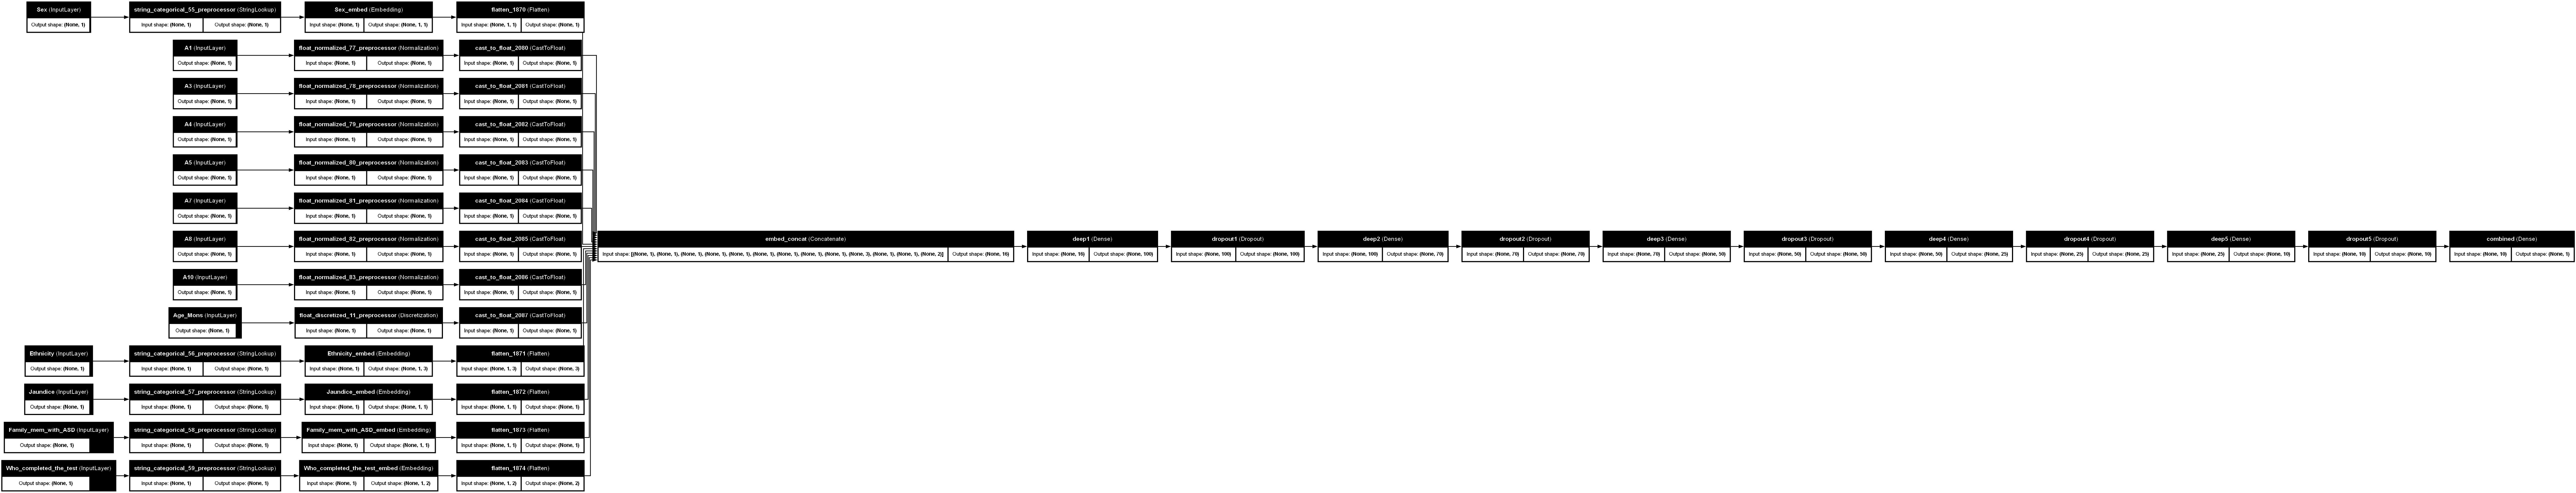

In [451]:
plot_model(
    models_4[0], to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

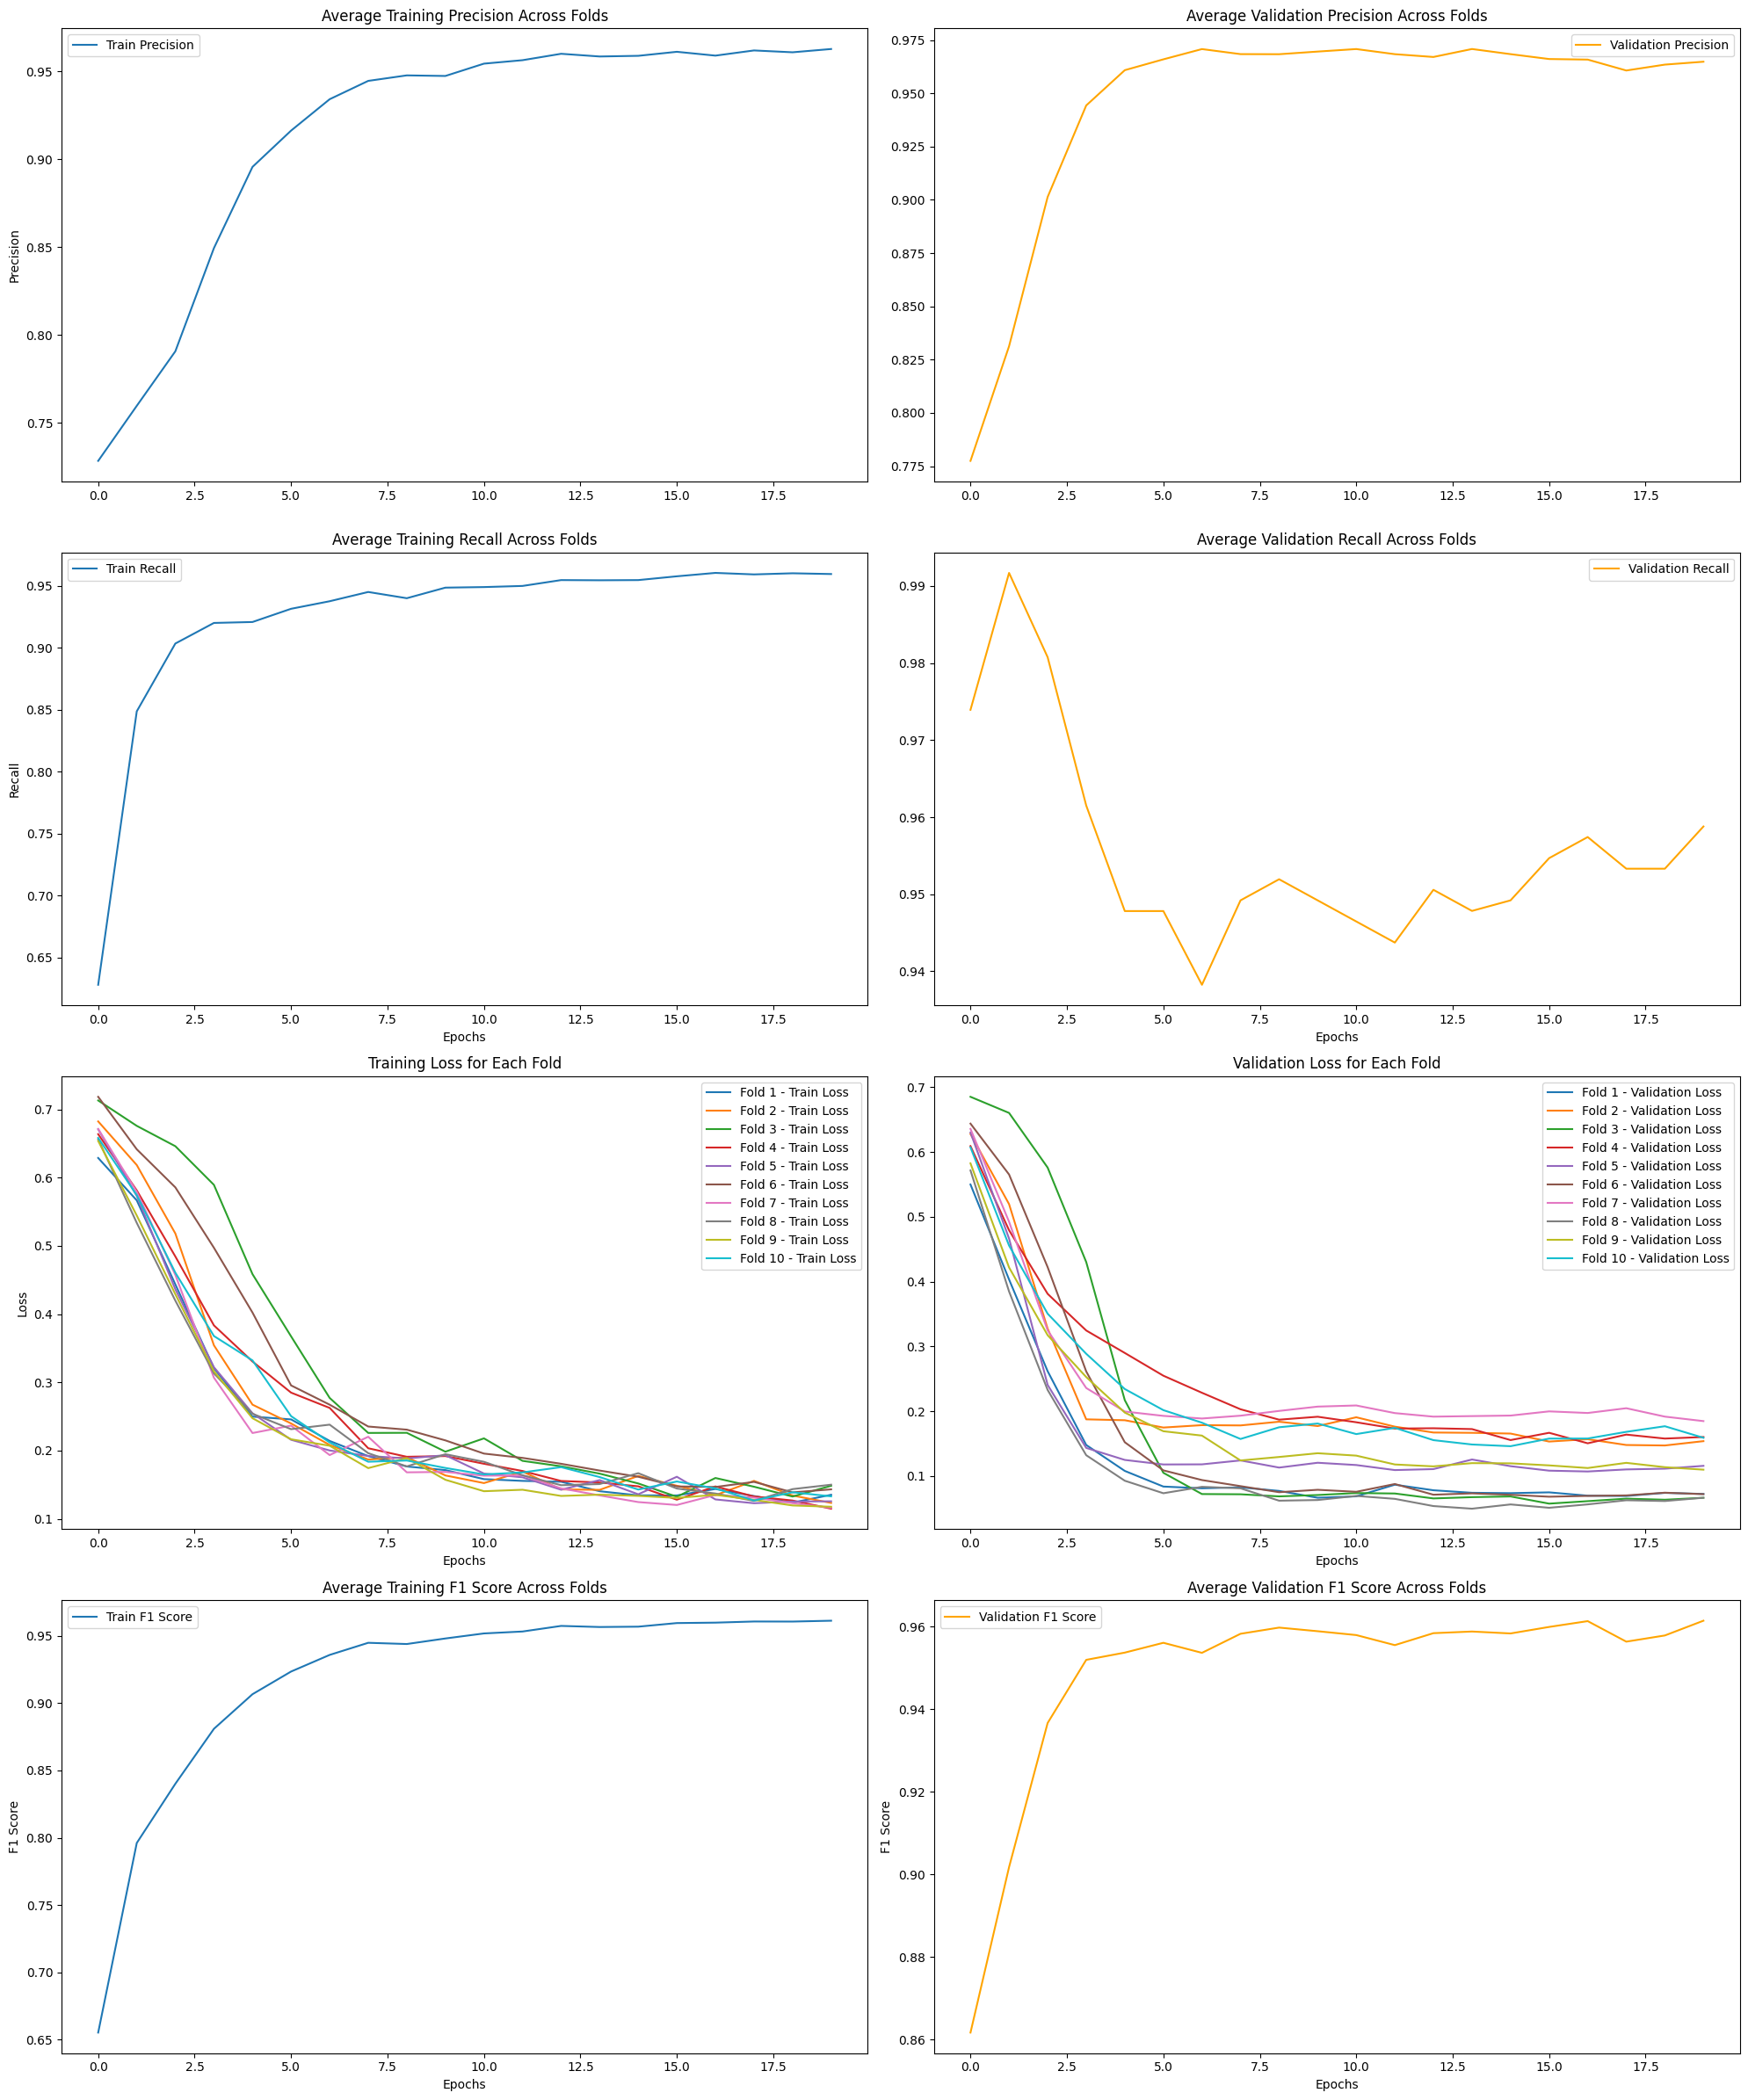

In [452]:
num_epochs = len(histories_model4[0].history['loss'])
num_folds = len(histories_model4)


f1_scores_train_model4 = []
f1_scores_val_model4 = []


avg_train_precision = np.zeros(num_epochs)
avg_val_precision = np.zeros(num_epochs)
avg_train_recall = np.zeros(num_epochs)
avg_val_recall = np.zeros(num_epochs)


for history in histories_model4:
    train_precision = np.array(history.history['precision'])
    val_precision = np.array(history.history['val_precision'])
    train_recall = np.array(history.history['recall'])
    val_recall = np.array(history.history['val_recall'])
    

    f1_scores_train = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-10)
    f1_scores_val = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-10)
    

    f1_scores_train_model4.append(f1_scores_train)
    f1_scores_val_model4.append(f1_scores_val)
    

    avg_train_precision += train_precision
    avg_val_precision += val_precision
    avg_train_recall += train_recall
    avg_val_recall += val_recall


avg_train_precision /= num_folds
avg_val_precision /= num_folds
avg_train_recall /= num_folds
avg_val_recall /= num_folds


avg_f1_scores_train = np.mean(f1_scores_train_model4, axis=0)
avg_f1_scores_val = np.mean(f1_scores_val_model4, axis=0)


plt.figure(figsize=(20, 24))


plt.subplot(4, 2, 1)
plt.plot(avg_train_precision, label='Train Precision')
plt.ylabel('Precision')
plt.title('Average Training Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 2)
plt.plot(avg_val_precision, label='Validation Precision', color='orange')
plt.title('Average Validation Precision Across Folds')
plt.legend()


plt.subplot(4, 2, 3)
plt.plot(avg_train_recall, label='Train Recall')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.title('Average Training Recall Across Folds')
plt.legend()


plt.subplot(4, 2, 4)
plt.plot(avg_val_recall, label='Validation Recall', color='orange')
plt.xlabel('Epochs')
plt.title('Average Validation Recall Across Folds')
plt.legend()


for i, history in enumerate(histories_model4):
    train_loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])
    

    plt.subplot(4, 2, 5)
    plt.plot(train_loss, label=f'Fold {i+1} - Train Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Training Loss for Each Fold')
    

    plt.subplot(4, 2, 6)
    plt.plot(val_loss, label=f'Fold {i+1} - Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Validation Loss for Each Fold')


plt.subplot(4, 2, 5)
plt.legend()
plt.subplot(4, 2, 6)
plt.legend()

# Plot average F1 scores for training and validation in separate figures
plt.subplot(4, 2, 7)
plt.plot(avg_f1_scores_train, label='Train F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Training F1 Score Across Folds')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(avg_f1_scores_val, label='Validation F1 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Average Validation F1 Score Across Folds')
plt.legend()

plt.tight_layout()
plt.show()


<h2>2.3.2 statistical comparison between our best model and the deep model</h2>
<p>The statistical analysis comparing Model 3 (5 layers with both wide and deep branches) and Model 4 (5 layers with only the deep branch) suggests that removing the wide branch does not significantly affect model performance. The confidence interval for the F1 score comparison between Model 3 and Model 4 is -0.0158 to 0.0292, with a mean difference (d_bar) of 0.0067. Since this interval includes zero, it indicates that the difference is not statistically significant. Additionally, the t-test yielded a T-statistic of -3.31 and a p-value of 0.0011, confirming a statistically significant difference, but the practical impact on performance is minimal.</p>

In [453]:
model4_f1= np.array(f1_scores_val_model4)
print(f"""
The statistical score for comparing model3 with 5 layers wide and deep branches and model4 with 5 layers the deep branch only: 
{compare_models_confidence_interval(model3_f1, model4_f1)}
""")



The statistical score for comparing model3 with 5 layers wide and deep branches and model4 with 5 layers the deep branch only: 
{'Mean Difference (d_bar)': 0.006720494771720672, '95% Confidence Interval': (-0.01579591465037998, 0.029236904193821328)}



In [454]:
model4_f1_flat = model4_f1.flatten()

if ttest_statistical_comparison(model3_f1_flat,model4_f1_flat) < 0.05:
    print("There is a statistically significant difference between model3 and model4.")
else:
    print("There is no statistically significant difference between model3 and model4.")

T-statistic: -3.305616390621932
p-value: 0.0011241263394557077
There is a statistically significant difference between model3 and model4.


In [455]:
model4_recalls=[]
model4_precisions=[]
for history in histories_model4:
    val_recall = history.history['val_recall']
    val_precision = history.history['val_precision']
    model4_recalls.append(val_recall)
    model4_precisions.append(val_precision)
print_model_metrics("Model 3", model3_precisions, model3_recalls, model3_f1)
print_model_metrics("Model 4", model4_precisions, model4_recalls, model4_f1)


Model 3 Metrics:
--------------------------------------------------
Precision:
  Overall Average: 0.9338
  Average per Fold: [0.94973065 0.90557    0.95352783 0.92436652 0.93042573 0.94107722
 0.94632715 0.95127892 0.91876212 0.91710283]
  Average per Epoch: [0.73476379 0.77608722 0.86118434 0.91461499 0.96434162 0.96072977
 0.96454211 0.96065937 0.96308299 0.96325681 0.96580698 0.96092316
 0.96091204 0.96070247 0.95957115 0.96207179 0.96191972 0.96306143
 0.95960499 0.95850117]

Recall:
  Overall Average: 0.9561
  Average per Fold: [0.97465752 0.95547943 0.96095889 0.97328766 0.93472224 0.97013887
 0.88698629 0.99178082 0.95753422 0.95547943]
  Average per Epoch: [0.99726027 0.99726027 0.97945205 0.97123287 0.94649923 0.93957381
 0.94360729 0.9450152  0.94775493 0.94366437 0.94916285 0.95053272
 0.95327244 0.95051368 0.9491248  0.94916285 0.95327244 0.95053271
 0.95190257 0.95325341]

F1 Score:
  Overall Average: 0.9422
  Average per Fold: [0.95911198 0.92930513 0.95325529 0.94715801

<h4>Conclusion</h4>
<p>
These findings imply that omitting the wide branch does not substantially impact the model’s F1 score or generalization ability. Consequently, Model 4, with only the deep branch, achieves comparable performance to Model 3 while potentially reducing model complexity and computational requirements. This makes Model 4 a viable and efficient option without compromising predictive accuracy.</p>

<h4>2.3.3 AUC</h4>
<p>The AUC comparison between Model 3 (wide and deep branches) and Model 4 (deep branch only) showed that both models performed similarly, with Model 4 slightly outperforming Model 3. Model 4 achieved a mean AUC of 0.9913, compared to Model 3's 0.9901, indicating that removing the wide branch did not reduce performance. Thus, Model 4 is a more efficient choice, offering comparable accuracy with reduced complexity.</p>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

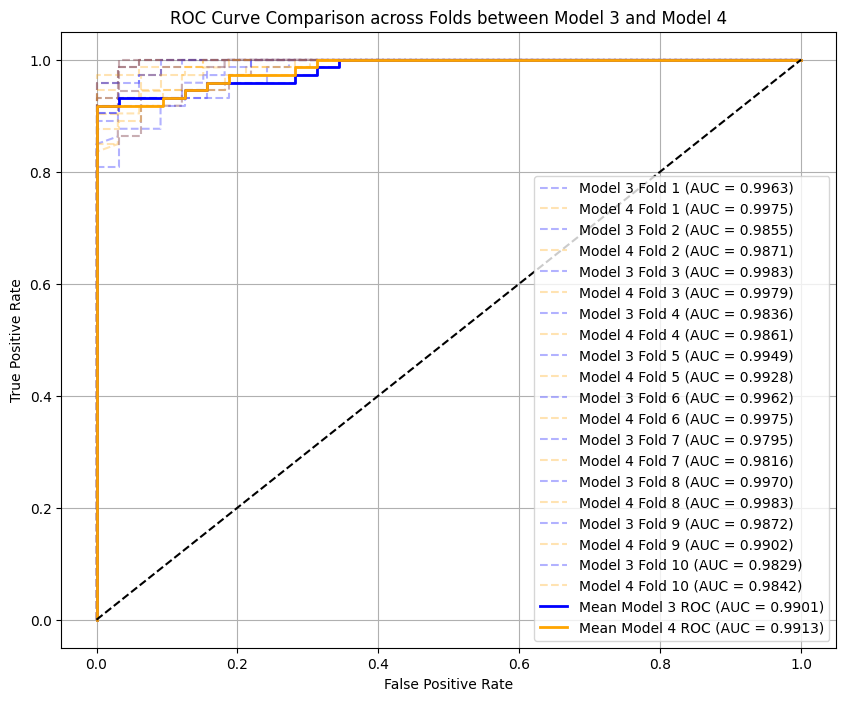

Model 3 Mean AUC across folds: 0.9901
Model 4 Mean AUC across folds: 0.9913
Model 4 performs better on average across folds.


In [456]:
auc_scores_model3 = []
auc_scores_model4 = []


plt.figure(figsize=(10, 8))

for fold_idx, (model3, model4, test_df) in enumerate(zip(models_3, models_4, test_dfs)):
    test_ds = create_dataset_from_dataframe(test_df)
    
    y_true = []
    y_pred_proba_model3 = []
    y_pred_proba_model4 = []
    
    for x_batch, y_batch in test_ds:
        y_true.extend(y_batch.numpy())
        y_pred_proba_model3.extend(model3.predict(x_batch).flatten())
        y_pred_proba_model4.extend(model4.predict(x_batch).flatten())
    
    y_true = np.array(y_true)
    y_pred_proba_model3 = np.array(y_pred_proba_model3)
    y_pred_proba_model4 = np.array(y_pred_proba_model4)

    fpr3, tpr3, _ = roc_curve(y_true, y_pred_proba_model3)
    auc_fold_model3 = auc(fpr3, tpr3)
    auc_scores_model3.append(auc_fold_model3)

    fpr4, tpr4, _ = roc_curve(y_true, y_pred_proba_model4)
    auc_fold_model4 = auc(fpr4, tpr4)
    auc_scores_model4.append(auc_fold_model4)

    plt.plot(fpr3, tpr3, linestyle='--', alpha=0.3, color='blue', label=f'Model 3 Fold {fold_idx + 1} (AUC = {auc_fold_model3:.4f})')
    plt.plot(fpr4, tpr4, linestyle='--', alpha=0.3, color='orange', label=f'Model 4 Fold {fold_idx + 1} (AUC = {auc_fold_model4:.4f})')

mean_auc_model3 = np.mean(auc_scores_model3)
mean_auc_model4 = np.mean(auc_scores_model4)

plt.plot(fpr3, tpr3, color='blue', linewidth=2, label=f'Mean Model 3 ROC (AUC = {mean_auc_model3:.4f})')
plt.plot(fpr4, tpr4, color='orange', linewidth=2, label=f'Mean Model 4 ROC (AUC = {mean_auc_model4:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison across Folds between Model 3 and Model 4')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Model 3 Mean AUC across folds: {mean_auc_model3:.4f}")
print(f"Model 4 Mean AUC across folds: {mean_auc_model4:.4f}")

if mean_auc_model3 > mean_auc_model4:
    print("Model 3 performs better on average across folds.")
else:
    print("Model 4 performs better on average across folds.")


<h4>3. Exceptional Work</h4>
<p>The code blow visualizes the embedding weights of categorical features in the model by reducing them to two dimensions, making it easier to interpret the embeddings. First, a dictionary (`class_name_dict`) is defined to map each embedding layer to its respective categorical labels, ensuring that each data point in the visualization can be labeled meaningfully. The code then iterates through the layers of the first model (`models_4[0]`), looking for layers with names ending in "_embed" that correspond to categorical columns. When it finds these layers, it extracts the embedding weights. If the weights are already in two dimensions, they are used directly; otherwise, PCA is applied to reduce them to two dimensions, as long as there are enough samples. If the dimensions are insufficient for PCA, the code skips that layer and notes the reason.

For each processed layer, a scatter plot is created where each point represents an embedding vector for a specific category, and each point is labeled with its class name. This allows for a visual inspection of the embedding space, showing relationships between categories. For example, in the plot for `Ethnicity_embed`, points labeled with ethnicity names such as "Middle Eastern," "Hispanic," "Black," etc., are displayed in two dimensions. Categories that are closer together on the plot have similar embeddings, suggesting that the model perceives them as similar in feature space. This kind of visualization can reveal clusters or separations in the embedding space, helping to interpret how the model encodes different categories. For other layers like `Sex_embed` and `Jaundice_embed`, PCA was skipped due to insufficient dimensions or samples, which the code notes for clarity.</p>

Skipping PCA for Sex_embed: insufficient dimensions or samples.


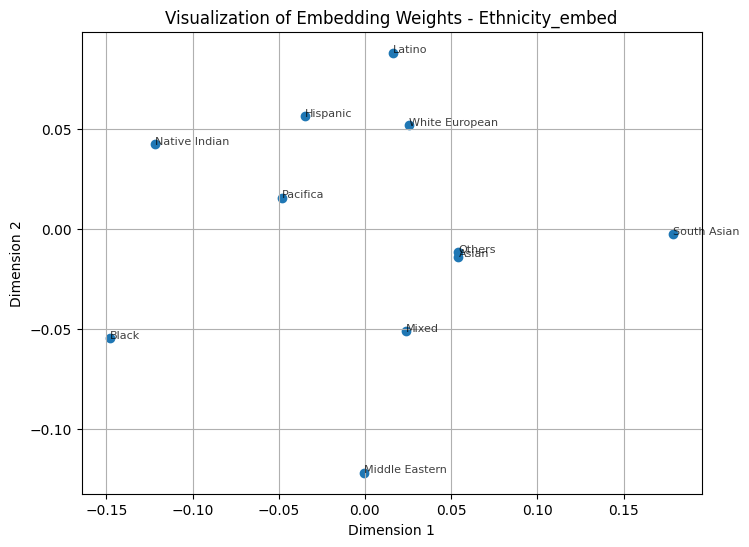

Skipping PCA for Jaundice_embed: insufficient dimensions or samples.
Skipping PCA for Family_mem_with_ASD_embed: insufficient dimensions or samples.


In [460]:
class_name_dict = {
    "Sex_embed": ["Female", "Male"],
    "Ethnicity_embed": [
        "Middle Eastern", "White European", "Hispanic", "Black", "Asian",
        "South Asian", "Native Indian", "Others", "Latino", "Mixed", "Pacifica"
    ],
    "Jaundice_embed": ["Yes", "No"],
    "Family_mem_with_ASD_embed": ["No", "Yes"]
}

for layer in models_4[0].layers:
    if '_embed' in layer.name and layer.name[:-6] in categorical_columns:
        embedding_weights = layer.get_weights()[0]
        
        class_names = class_name_dict.get(layer.name, [f'Category {i}' for i in range(embedding_weights.shape[0])])
        
        if len(class_names) < embedding_weights.shape[0]:
            class_names += [f'Category {i}' for i in range(len(class_names), embedding_weights.shape[0])]
        
        if embedding_weights.shape[1] == 2:
            reduced_embeddings = embedding_weights 
        elif embedding_weights.shape[1] > 1 and embedding_weights.shape[0] > 1:
            pca = PCA(n_components=2)
            reduced_embeddings = pca.fit_transform(embedding_weights)
        else:
            print(f"Skipping PCA for {layer.name}: insufficient dimensions or samples.")
            continue

        plt.figure(figsize=(8, 6))
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
        
        for i, class_name in enumerate(class_names):
            plt.annotate(class_name, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8, alpha=0.75)

        plt.title(f"Visualization of Embedding Weights - {layer.name}")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.grid(True)
        plt.show()


<p>The visualization of the `Ethnicity_embed` layer reveals how the model represents different ethnicities in a two-dimensional embedding space, with each point representing a specific ethnicity. For example, "Hispanic" and "White European" are positioned closely, indicating that the model perceives these categories as similar based on patterns in the training data. In contrast, "South Asian" is located further from the main cluster, suggesting it has a unique representation, likely due to distinct characteristics associated with this category in the dataset. Similarly, "Black" appears isolated on the left, implying that the model recognizes unique patterns for this ethnicity.

Other ethnicities, such as "Native Indian" and "Pacifica," are positioned near each other, possibly reflecting shared characteristics that the model detected during training. Categories like "Others," "Latino," and "Mixed" are centrally located but not tightly clustered with any single ethnicity, suggesting that they hold moderate similarities across various groups. The embedding layers for `Jaundice_embed` and `Family_mem_with_ASD_embed` were skipped for PCA due to insufficient dimensions or samples, indicating simpler representations for these binary features. Overall, the embedding plot reveals how the model internally clusters or differentiates between ethnicities, offering insight into the relationships it learned during training.</p>

<h4>References</h4>
<ul>
    <li>T-Test: <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">https://www.investopedia.com/terms/t/t-test.asp</a></li>
    <li>Machine Learning Notebooks by eclarson (GitHub Repository): <a href="https://github.com/eclarson/MachineLearningNotebooks" target="_blank">https://github.com/eclarson/MachineLearningNotebooks</a></li>
    <li>OpenAI GPT Model: <a href="https://chatgpt.com/" target="_blank">https://chatgpt.com/</a></li>
    <li>Autism Screening for Toddlers Dataset: <a href="https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers" target="_blank">https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers</a></li>
</ul>
